# Проект " Анализ оттока  клиентов регионального банка"

**Введение:**
Заказчиком исследования является менеджер отдела маркетинга регионального банка «Метанпром», расположенного в Ярославле и двух областных городах: Ростов Великий и Рыбинск.

В последнее время банк столкнулся с ростом оттока клиентов,что  начинает становиться проблемой, угрожающей его существованию.

Так как привлечение новых клиентов дорого, банку необходимо разработать стратегию по удержанию существующих клиентов. 

В связи с этим поставлена **задача**: проанализировать действующих клиентов банка и максимально эффективно выделить однородные высокооточные сегменты отточных клиентов, максимально покрывающие проблемные зоны банка, с последующей разработкой мер маркетингового воздействия на эти сегменты, направленных на уменьшение оттока клиентов.

В распоряжении имеются данные о клиентах регионального банка «Метанпром» за последний месяц- датасет следующей структуры:
* userid — идентификатор пользователя,
* score — баллы кредитного скоринга,
* city — город,
* gender — пол,
* age — возраст,
* equity — количество баллов собственности(приблизительная оценка собственности клиента)
* balance — баланс на счёте,
* products — количество продуктов, которыми пользуется клиент,
* credit_card — есть ли кредитная карта,
* last_activity — был ли клиент активен последнее время,
* est_salary — заработная плата клиента,
* churn — ушёл или нет.

Декомпозиция(план исследования):
1. Загрузка и изучение общей информации о данных.
    * Загрузка данных из файла в датафрейм.
    * Изучение общей информации о полученном датафрейме (вывод первых пяти строк, использование методов info(), describe(), построение общей гистограммы для всех числовых столбцов, использование собственной функции). 
    * Определение необходимых шагов по подготовке данных для последующего анализа.
2. Предобработка данных.
    * Преобразование названий столбцов (в snake_case, при необходимости).
    * Преобразование данных в нужные типы (при необходимости). 
    * Обработка пропущенных значений: 
        * решение о целесообразности работы с пропусками в зависимости от доли пропущенных значений в столбце, 
        * исследование пропусков в столбце(столбцах) с большой долей пропусков, определение природы их возникновения, категории пропуска(MCAR, MAR,MNAR), принятие решения по возможности их корректного заполнения.
    * Проверка на наличие дубликатов(явных и неявных).
    * Проверка на наличие редких и выбивающихся значений.
    * Кодирование категориальных переменных('gender', 'city').
3. Исследовательский анализ данных:
    * Изучение распределения признаков в зависимости от оттока.
    * Определение значимых признаков отточности, интервалов значений признаков, связаных с повышенным оттоком: визуализация распределения признаков в разрезе оттока.
    * Составление портретов уходящих клиентов - сравнение значений мер центральных тенденций (среднее, медиана, мода - в  зависимости от) признака у отточных и неотточных клиентов. Составление таблицы.
    * Корреляционный анализ - составление матрицы корреляции признаков. Изучение и использование библиотеки phik.
4. Формулировка и проверка статистических гипотез:
    * Гипотеза о различии дохода между теми клиентами, которые ушли и теми, которые остались.
    * Одна - две гипотезы, сформулированые по результатам анализа предоставленных данных, которые помогут внести ясность в исследование.
5. Формирование целевых сегментов и рекомендаций по работе с ними.
6. Формирование общих выводов и рекомендаций для заказчика по мерам маркетингового воздействия, направленным на уменьшение оттока по каждому из выделенных сегментов.    
7. Подготовка презентации.
8. Формирование дашборда:
    * Подготовка и выгрузка данных.
    * Формирование дашборда в Tableau Public.

### Загрузка и изучение общей информации о данных

#### Загрузка данных 

Подгружаем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import math as mth
import phik

from scipy import stats as st
from statistics import mode

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_colwidth', None) 

Уточняем символ-разделитель предварительно открыв файл в текстовом редакторе (разделитель стандартный - ','). Считываем файл и сохраняем его в переменную.

In [2]:
data = pd.read_csv('__.csv')

#### Объявление фунций, необходимых для проведения анализа

##### Функция отображения общей информации о датафрейме

Данная функция принимает в качестве аргумента датафрейм и выводит основную информацию о каждом из его столбцов:
* наименование столбца, его описание на русском языке(в случае, если вторым аргументом в функцию передан словарь содержащий необходимую информацию);
* тип данных;
* информацию о наличии пропусков и выбросов.

In [3]:
def inform (data, dict_1 = None):
    '''Данная функция принимает в качестве аргумента датафрейм и выводит основную информацию о каждом из его столбцов:
    * наименование столбца, его описание на русском языке(в случае, если вторым аргументом в функцию передан словарь содержащий необходимую информацию);
    * тип данных;
    * информацию о наличии пропусков и выбросов.
    '''
    if dict_1 == None:
        dict_1 = {}
    print(f'Количество строк в датафрейме: {data.shape[0]}\n\nИнформация о столбцах датафрейма:\n')
    n = 1
    for column in data.columns:
        print(n,')',sep = '', end = ' ')
        try:
            print(f'Столбец "{column}" - {dict_1[column]}:')
        except:
            print(f'Столбец "{column}":')
        print(f'Тип данных: {data[column].dtype}')
        print(f'Количество уникальных значений: {data[column].nunique()}.')
        if data[column].isna().sum() == 0:
            print('Пропуски отсутствуют.')
        else: 
            print(f'Количество пропусков в столбце: {data[column].isna().sum()} ({data[column].isna().sum()/len(data):.2%}).')
        try:
            q1,q3 = data[column].quantile(0.25), data[column].quantile(0.75)
            iqr = q3 - q1
            data1 = data.loc[(data[column] < (q3 + 1.5*iqr)) & (data[column] > (q1 - 1.5*iqr))]
            length = len(data1)+data[column].isna().sum()
            if length == len(data):
                print('Выбросы отсутствуют.')
            else:
                print(f'Количество выбросов в столбце: {len(data) - length} ({(len(data) - length)/len(data):.2%}).')
        except:
            pass
        print('-'*45)
        n+=1

На основе полученной информации сформируем словарь, необходимый для функции "inform", где ключ - наименование столбца датасета, значение - его текстовое описание на русском языке. 

In [4]:
name_data = {'user_id': 'идентификатор пользователя',
'score': 'баллы кредитного скоринга',
'city': 'город',
'gender': 'пол',
'age': 'возраст',
'equity': 'количество баллов собственности',
'balance': 'баланс на счёте',
'products':'количество продуктов, которыми пользуется клиент',
'credit_card': 'есть ли кредитная карта',
'last_activity':'активный клиент',
'est_salary':'заработная плата клиента',
'churn':'ушёл или нет'
}

##### Функция визуализации

In [5]:
def group_visual (data, column, column_g, bins = 50):
    ''' Данная функция принимает в качестве аргументов датафрейм  и названия 2 его столбцов и строит визуализацию распределения
    значений столбца "column" c группировкой в зависимости от значений столбца "column_g".'''
    
    y_line = data[column_g].mean()
    title_name = {'not_balance' : ' пропущенных значений в столбце "balanсe"',
                  'churn': 'оттока клиентов',
                  'not_age':'пропущенных значений в столбце "age"'}
    title_name_2 = {'user_id':'по id пользователя',
                    'score': 'баллам кредитного скоринга',
                  'city': 'городу',
                  'gender': 'полу',
                  'age': 'возрасту',
                  'equity': 'количеству баллов собственности',
                  'balance': 'балансу на счёте клиента',
                  'products':'количеству продуктов, которыми пользуется клиент',
                  'credit_card': 'наличию кредитной карты',
                  'last_activity':'активности клиента',
                  'est_salary':'заработной плате клиента',
                  'churn':'вероятности оттока'}
    x_name = {'user_id':'id пользователя',
              'score': 'Баллы кредитного скоринга',
              'city': 'Город клиента',
              'gender': 'Пол клиента',
              'age': 'Возраст клиента',
              'equity': 'Количество баллов собственности',
              'balance': 'Баланс на счёте',
              'products':'Количеству продуктов, которыми пользуется клиент',
              'credit_card': 'Наличие кредитной карты',
              'last_activity':'Активность клиента',
              'est_salary':'Заработная плата клиента',
              'churn':'Вероятность оттока'}
    if data[column].nunique() > 10:
        if column == 'age':
            tmp = data.copy().assign(balance = data.balance.clip(0,3e6))
            bins = np.arange(data.age.min(), data.age.max(), 1)
        sns.histplot(data=data, x=column, hue=column_g, bins=bins, stat='density', common_norm=False, kde=True)
        plt.title(f'Распределение {title_name[column_g]} по {title_name_2[column]}')
        plt.xlabel(f'{x_name[column]}')
        plt.ylabel('Плотность')
        plt.show()
    else:
        sns.barplot(x=column, y=column_g, data=data.groupby(column)[column_g].mean().reset_index())
        plt.title(f'Доля {title_name[column_g]} по  {title_name_2[column]}')
        plt.axhline(y = y_line, color = 'b', linestyle = '--', label = "В среднем по банку")
        plt.xlabel(f'{x_name[column]}')
        plt.ylabel('Доля')
        plt.legend()
        plt.show()

Также зададим параметры для графиков.

In [6]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.set_palette('muted')
plt.rc('font', size=10) 
plt.rc('axes', titlesize=12) 
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=12) 

#### Изучение общей информации о полученном датафрейме.

Изучим основную информацию о датасете.

In [7]:
display(data.head())
print(data.info())
data.describe()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Построим общую гистограмму для всех числовых рядов.

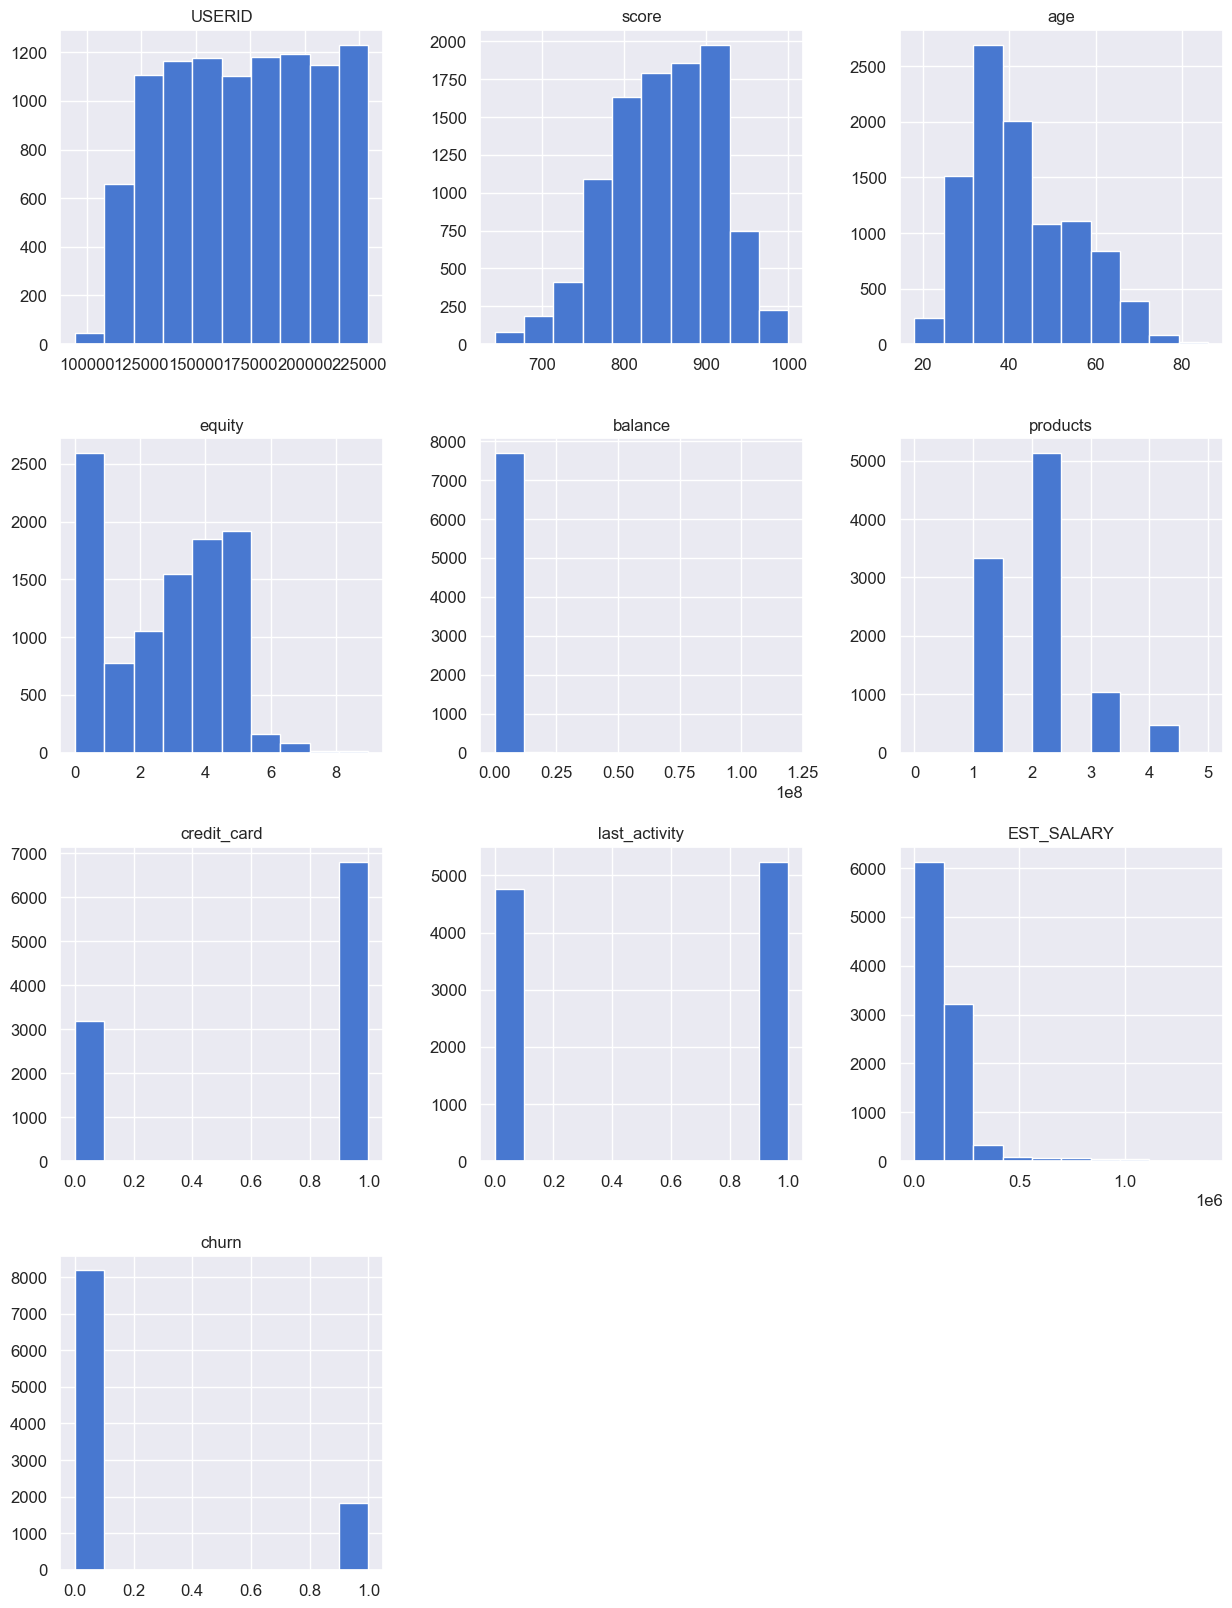

In [8]:
data.hist(figsize=(15, 20));

Для нормальной работы функции 'inform' приведем наименования столбцов в корректный вид.

In [9]:
data.rename(columns = {'USERID':'user_id', 
                       'EST_SALARY': 'est_salary'}, inplace = True) 

Дополнительно выведем информацию о каждом из столбцов.

In [10]:
inform(data, name_data)

Количество строк в датафрейме: 10000

Информация о столбцах датафрейма:

1) Столбец "user_id" - идентификатор пользователя:
Тип данных: int64
Количество уникальных значений: 9927.
Пропуски отсутствуют.
Выбросы отсутствуют.
---------------------------------------------
2) Столбец "score" - баллы кредитного скоринга:
Тип данных: float64
Количество уникальных значений: 348.
Пропуски отсутствуют.
Количество выбросов в столбце: 39 (0.39%).
---------------------------------------------
3) Столбец "city" - город:
Тип данных: object
Количество уникальных значений: 3.
Пропуски отсутствуют.
---------------------------------------------
4) Столбец "gender" - пол:
Тип данных: object
Количество уникальных значений: 2.
Пропуски отсутствуют.
---------------------------------------------
5) Столбец "age" - возраст:
Тип данных: float64
Количество уникальных значений: 68.
Количество пропусков в столбце: 26 (0.26%).
Количество выбросов в столбце: 28 (0.28%).
---------------------------------------------


**Вывод:**
Датафрейм состоит из 10000 строк и 12 столбцов.
Наименования столбцов приведены в корректный вид на стадии ознакомления с данными.
В столбцах "age" и "balance" имеются пропуски.  
В части столбцов имеются выбросы. При этом выбросы в столбцах "score", "age" и "churn" не являются аномальными значениями и предобработки не требуют. Выбросы в столбцах "est_salary" и "balance" требуют дополнительного изучения. 

Необходимые мероприятия по  предобработке данных:
1. Проверка на наличие редких и выбивающихся значений:
    * анализ столбцов "est_salary" и "balance",
    * изучение строк с нулевым значением в столбце "products".
2. Проработка столбцов с пропусками: 
    * удаление строк с пропущенными значениями в столбце  "age", ввиду малой доли пропущенных значений - 0,26%.
    * изучение природы пропусков в столбце "balance" и возможности их заполнения(доля пропусков составляет практически 23%).
3. Приведение значений в столбцах "score" и "age" к целочисленному типу.
4. Кодирование значений  переменных "city", "gender".
5. Проверка данных на наличие дубликатов, в том числе анализ столбца "user_id", ввиду меньшего количества уникальных значений в столбце по сравнению с количеством строк в датафрейме.  

### Предобработка данных

Зафиксируем количество строк в исходном датафрейме.

In [11]:
row_q = data.shape[0]

#### Проверка на наличие редких и выбивающихся значений

##### Изучение строк с нулевым значением в столбце "products"

Выведем строки с нулевым значением в столбце "products"

In [12]:
data[data['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


В фрейме всего одна строка с нулевым значением в столбце с количеством продуктов.
Данное значение аномально и подлежит удалению, так как клиентом считается лицо, пользующееся хотя бы одним из продуктов компании.
Наличие данной строки может быть обусловлено неудалением из базы ушедшего клиента.

In [13]:
data = data[data['products'] != 0]

##### Анализ значений столбца "est_salary"

Выведем значения описательной статистики по столбцу и построbм гистограмму распределения.

count    9.999000e+03
mean     1.478792e+05
std      1.393901e+05
min      2.546300e+03
25%      7.525212e+04
50%      1.196615e+05
75%      1.745011e+05
max      1.395064e+06
Name: est_salary, dtype: float64

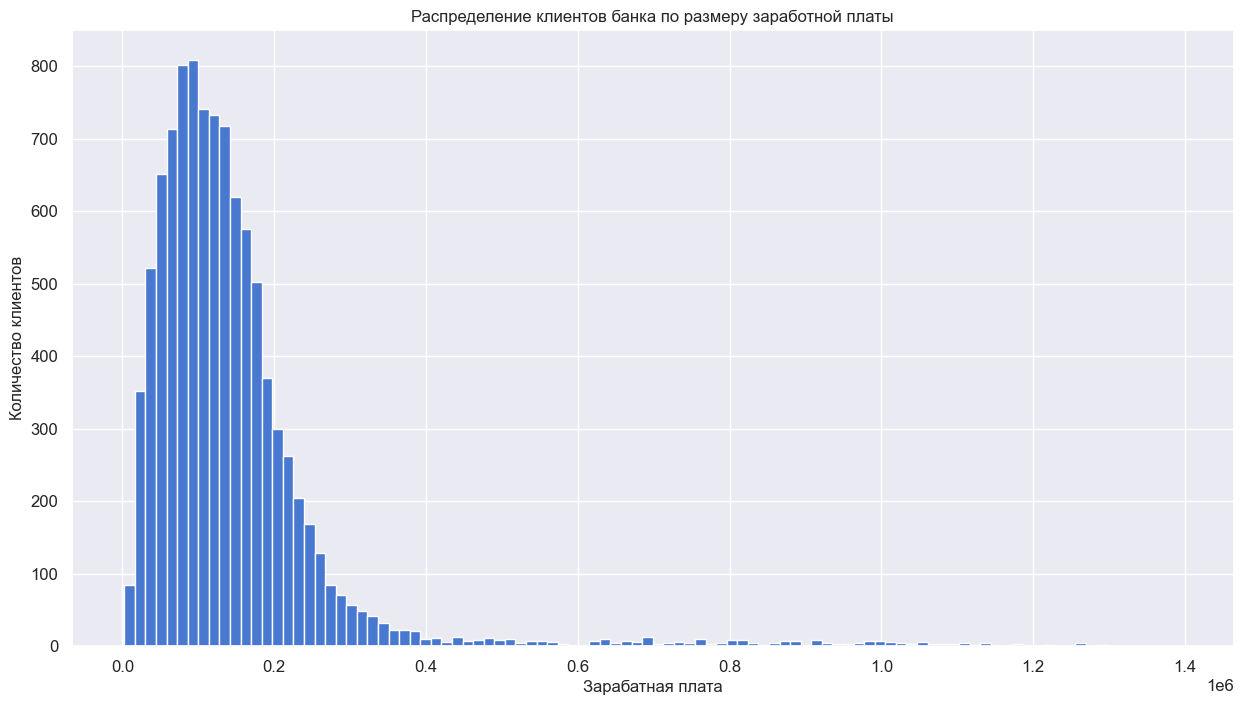

In [14]:
display(data['est_salary'].describe())
data['est_salary'].hist(bins = 100)
plt.title('Распределение клиентов банка по размеру заработной платы')
plt.xlabel('Зарабатная плата')
plt.ylabel('Количество клиентов')
plt.show();

Значения столбца имеют ярко выраженное правостороннее распределение, с выбросами в большую сторону. 
Построим гистограмму распределения значений свыше 425 000 рублей (примерное значение верхней границы нормального распределение). 

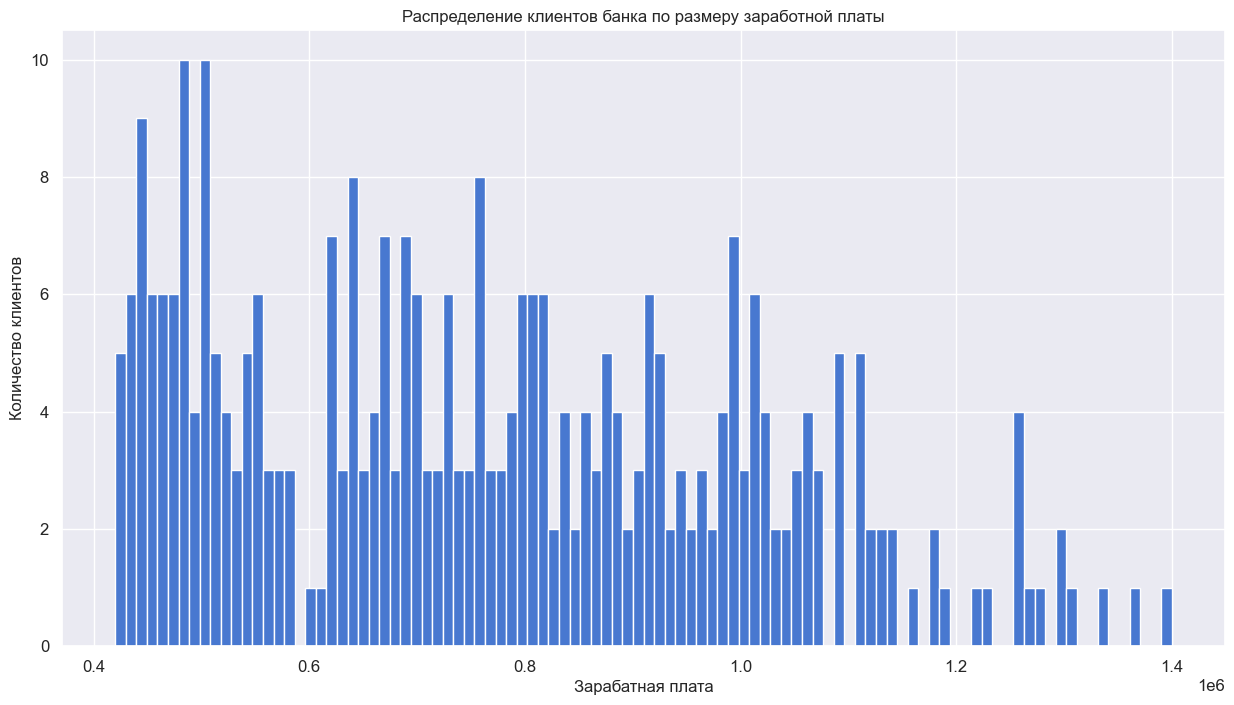

In [15]:
data['est_salary'].hist(bins = 100,range=(420000, 1400000))
plt.title('Распределение клиентов банка по размеру заработной платы')
plt.xlabel('Зарабатная плата')
plt.ylabel('Количество клиентов')
plt.show();

На гистограмме отсутствуют ярко выраженные одиночные сильноудаленные значения.
Выбросы в данном случае не являются аномалиями. Это значения дохода клиентов с высоким достатком. Такие клиенты очень важны для банка, поэтому их удаление некорректно.  
Что касается малых значений дохода, то так как значения в данном столбце являются оценочными и в них могут учитываться любые поступления денежных средств, сравнение значений с минимальным размером оплаты труда либо прожиточным минимумом не совсем корректно и считать их аномалиями не следует.

##### Анализ значений столбца 'balance'

Гистограмма распределения в целом по столбцу визуально не позволяет сделать какие либо выводы. Выведем значения описательной статистики по столбцу, а также  построим гистограммы распределения с ограничением диапазона.

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

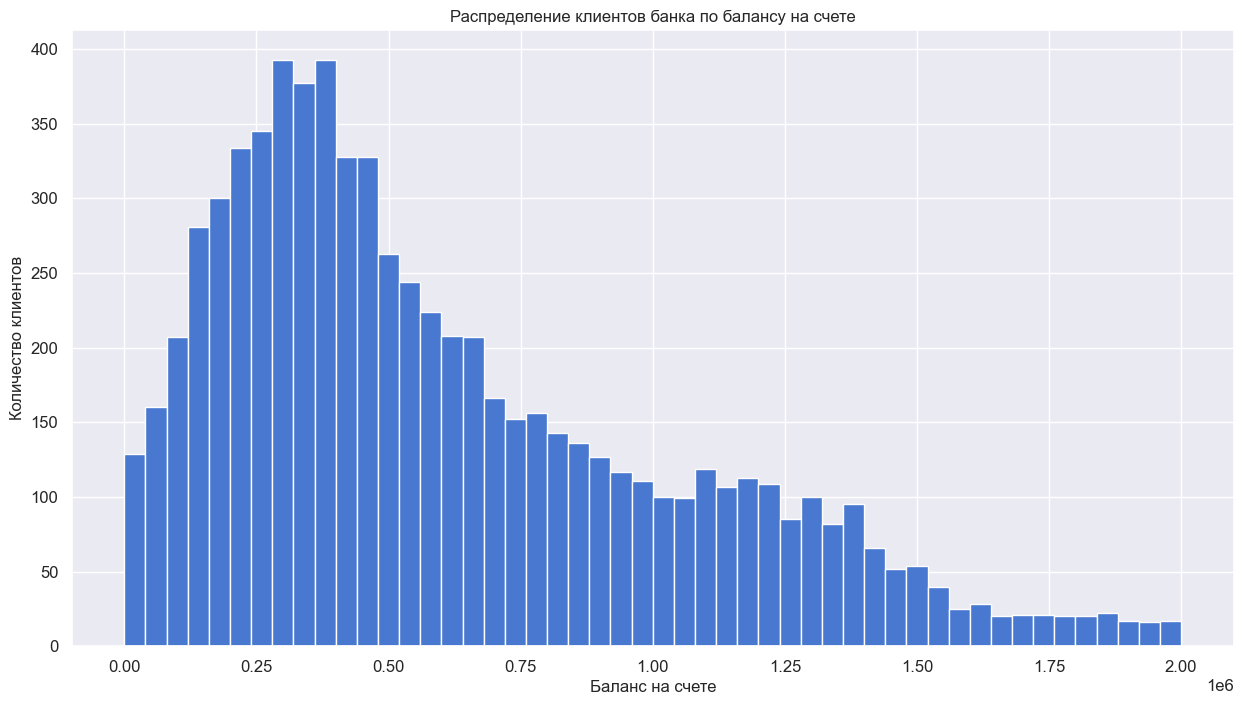

In [16]:
display(data['balance'].describe())
data['balance'].hist(bins = 50, range=(0,2000000))
plt.title('Распределение клиентов банка по балансу на счете')
plt.xlabel('Баланс на счете')
plt.ylabel('Количество клиентов')
plt.show();

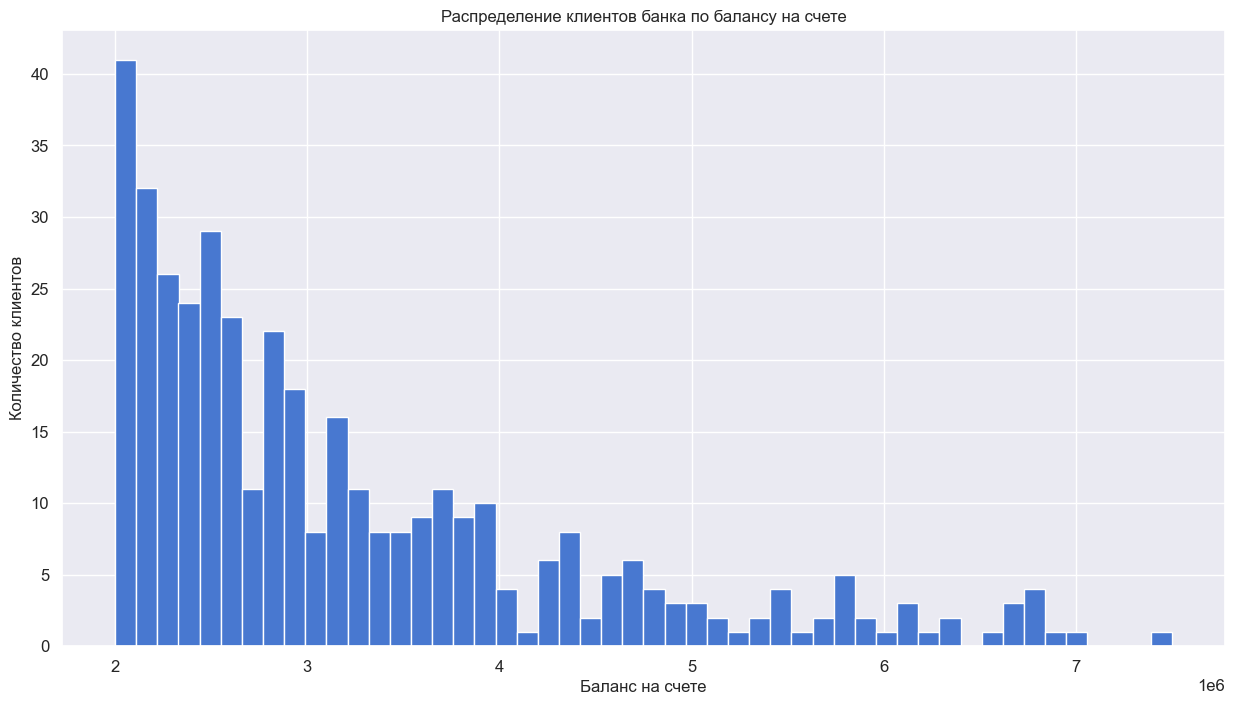

In [17]:
data['balance'].hist(bins = 50, range=(2000001,7500000))
plt.title('Распределение клиентов банка по балансу на счете')
plt.xlabel('Баланс на счете')
plt.ylabel('Количество клиентов')
plt.show();

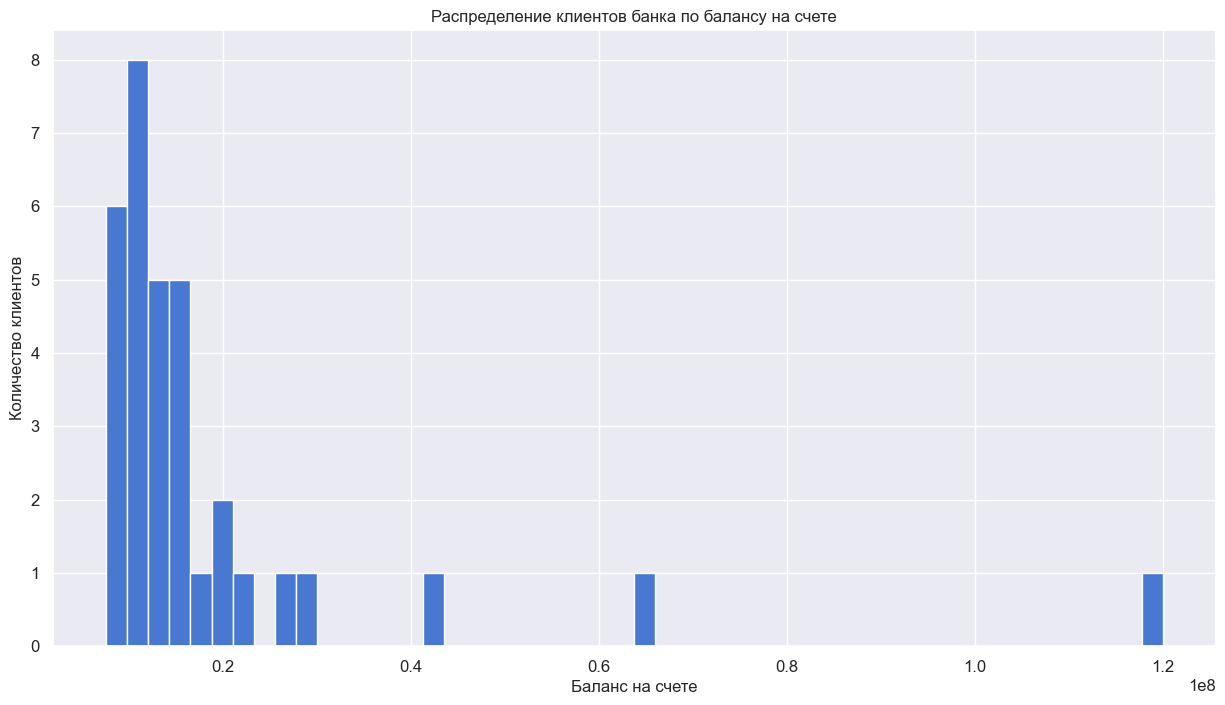

In [18]:
data['balance'].hist(bins = 50, range=(7500001,120000000))
plt.title('Распределение клиентов банка по балансу на счете')
plt.xlabel('Баланс на счете')
plt.ylabel('Количество клиентов')
plt.show();

Значения в столбце имеют еще более выраженное правостороннее распределение с очень большим разбросом значений.  
Так как клиентами банка являются лица с  различным социальным статусом и уровнем дохода, а доля свободных денежных средств, которую граждане размещают на счетах в банках, и конкретно в анализируемом банке,  у разных категорий населения может существенно отличаться, высокие значения баланса на счете клиента не следует считать аномальными. Данные клиенты являются одними из приоритетных в деятельности банка и исключать их из исследования не следует.

#### Проработка столбцов с пропусками

##### Работа с пропусками в столбце "age"

Изучим строки с пропусками в столбце с возрастом клиента.

In [19]:
data[data['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Добавим вспомогательный столбец, содержащий информацию о наличии пропусков в столбце с возрастом

In [20]:
data['not_age'] = data['age'].isna()

Визуализируем распределение признаков в зависимости от того, внесены ли значения в столбце с возрастом.

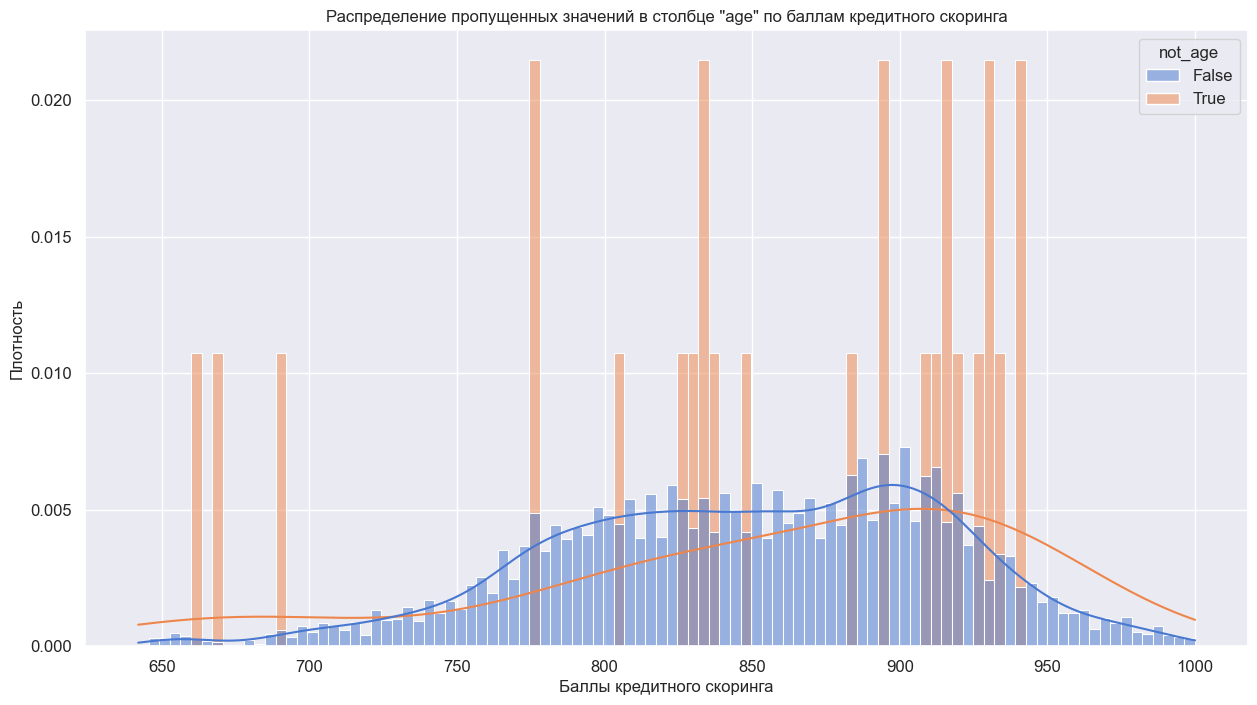

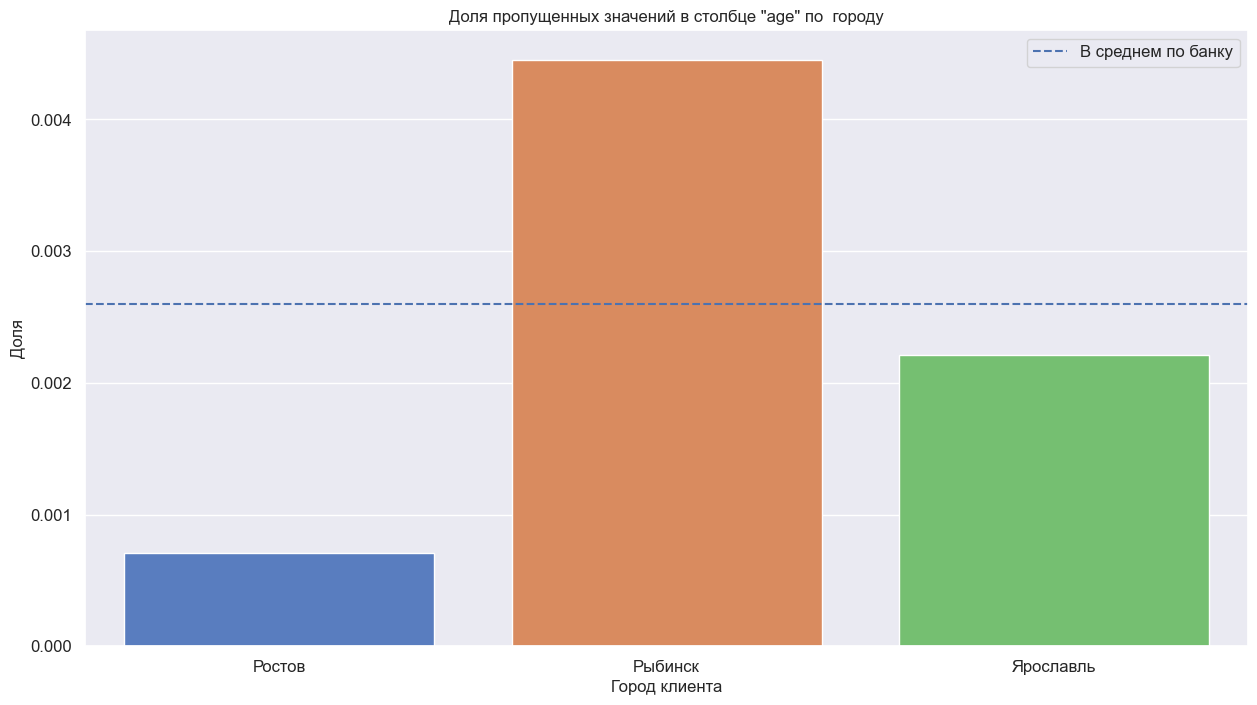

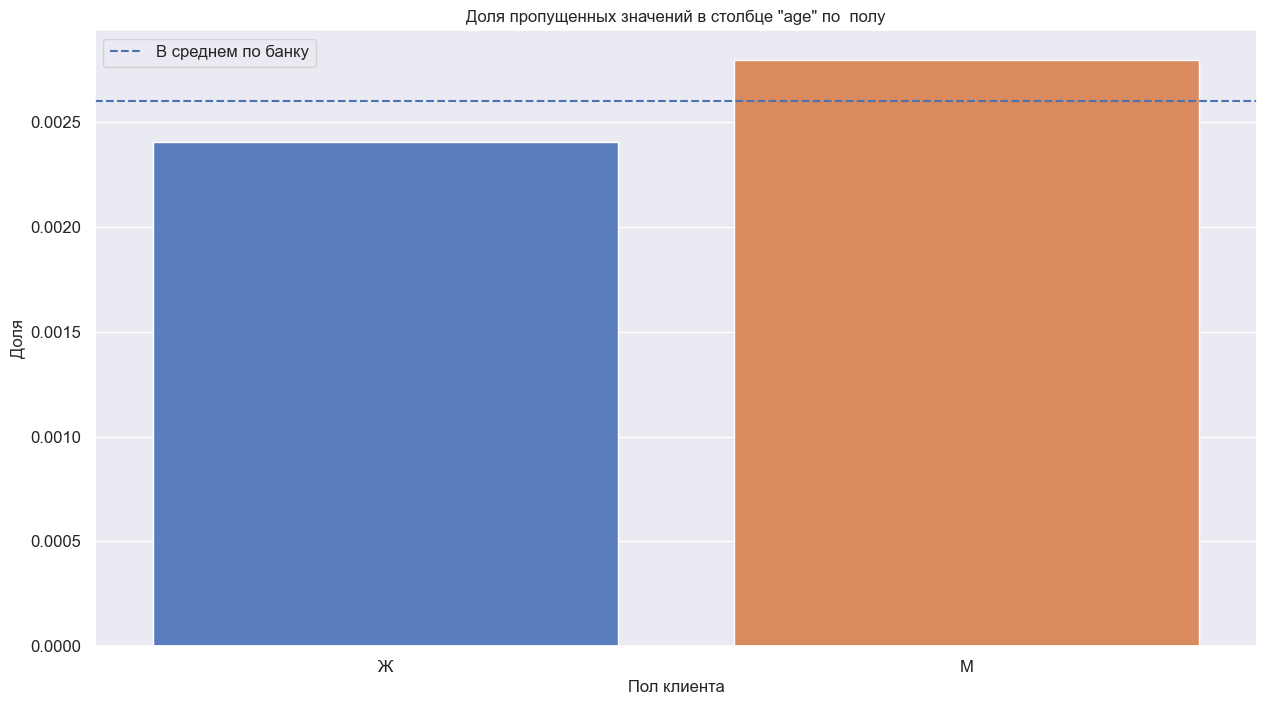

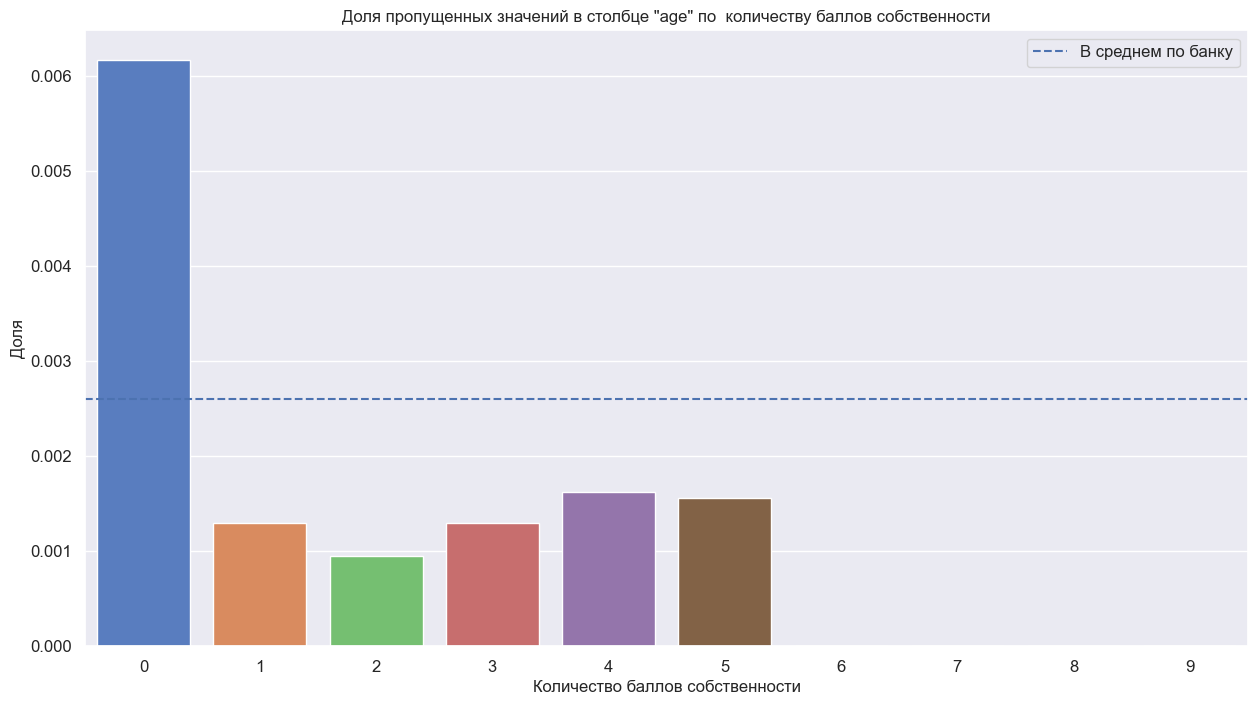

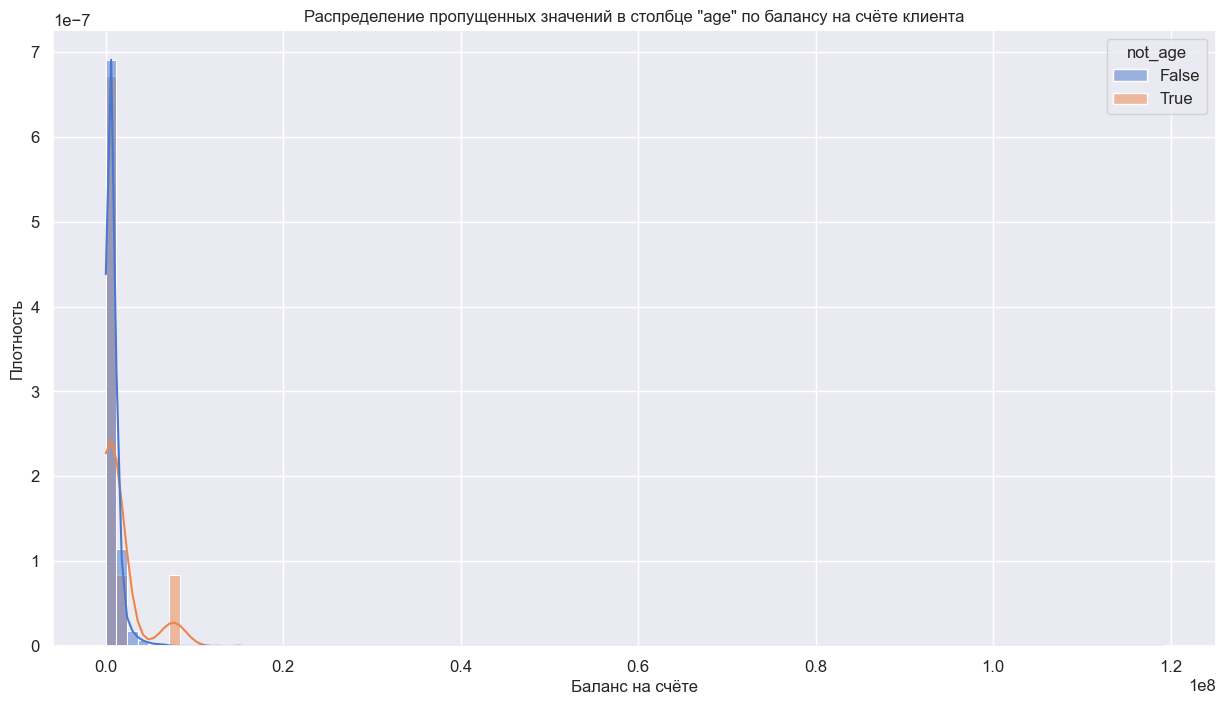

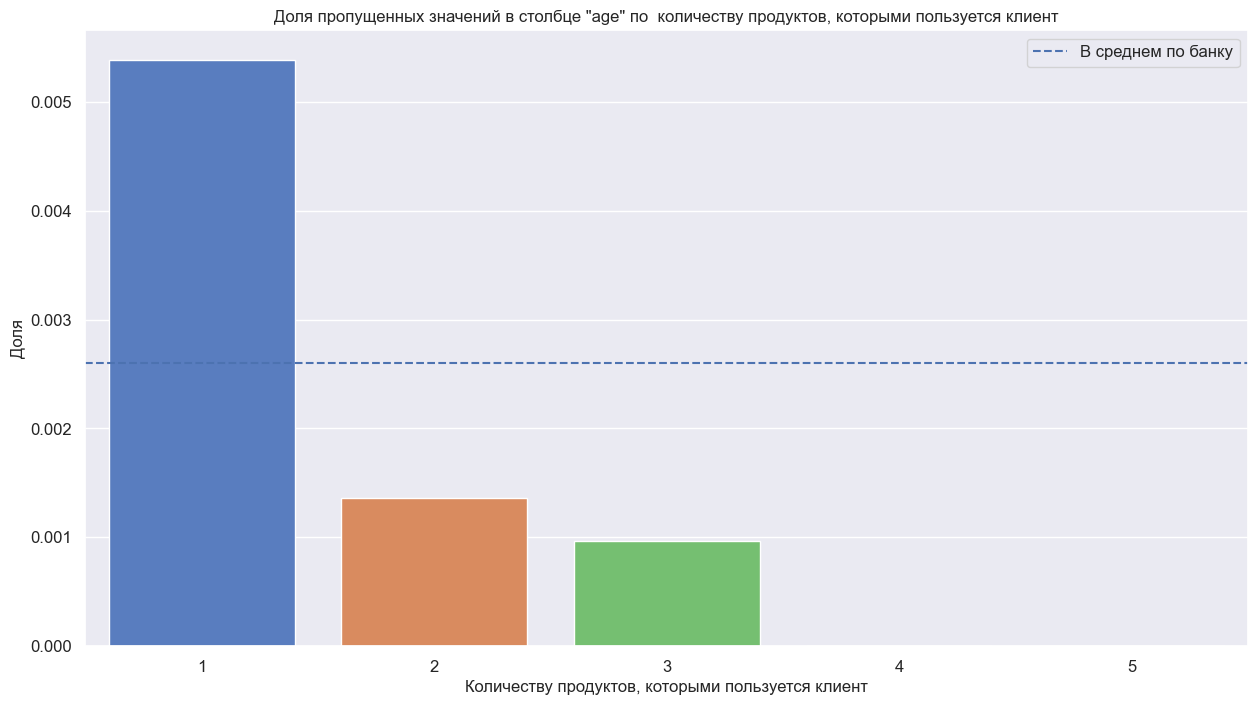

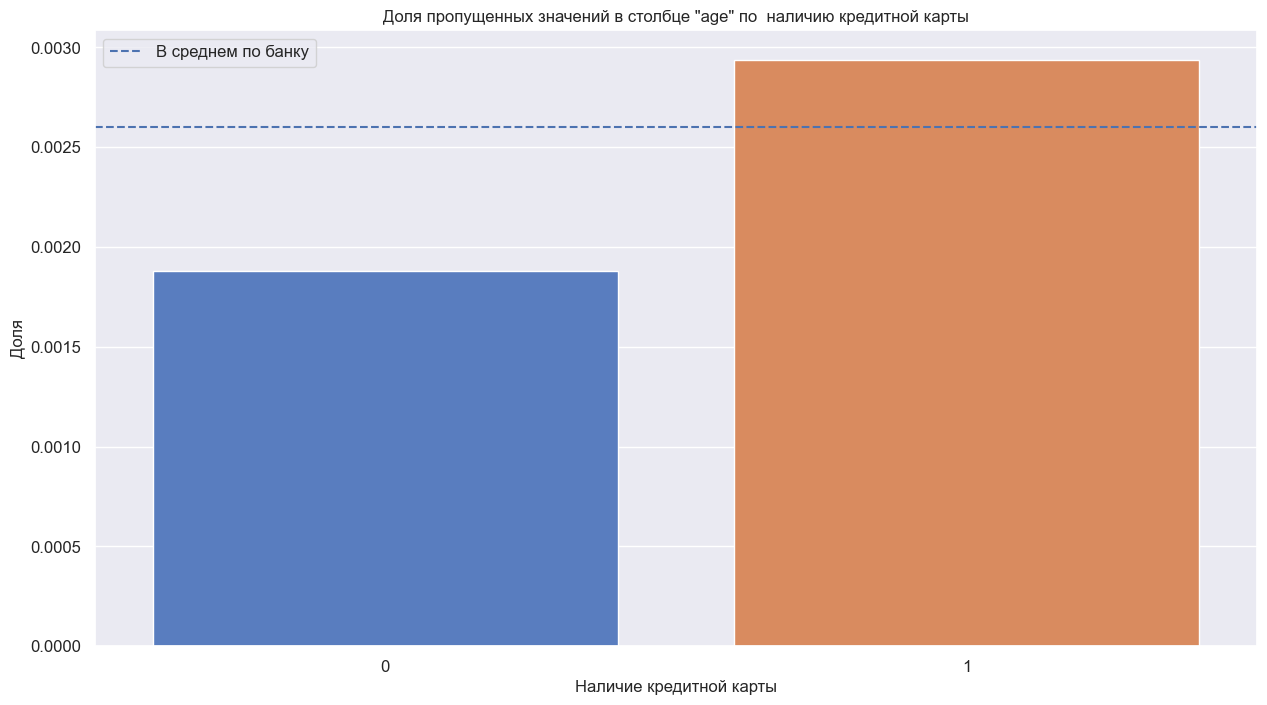

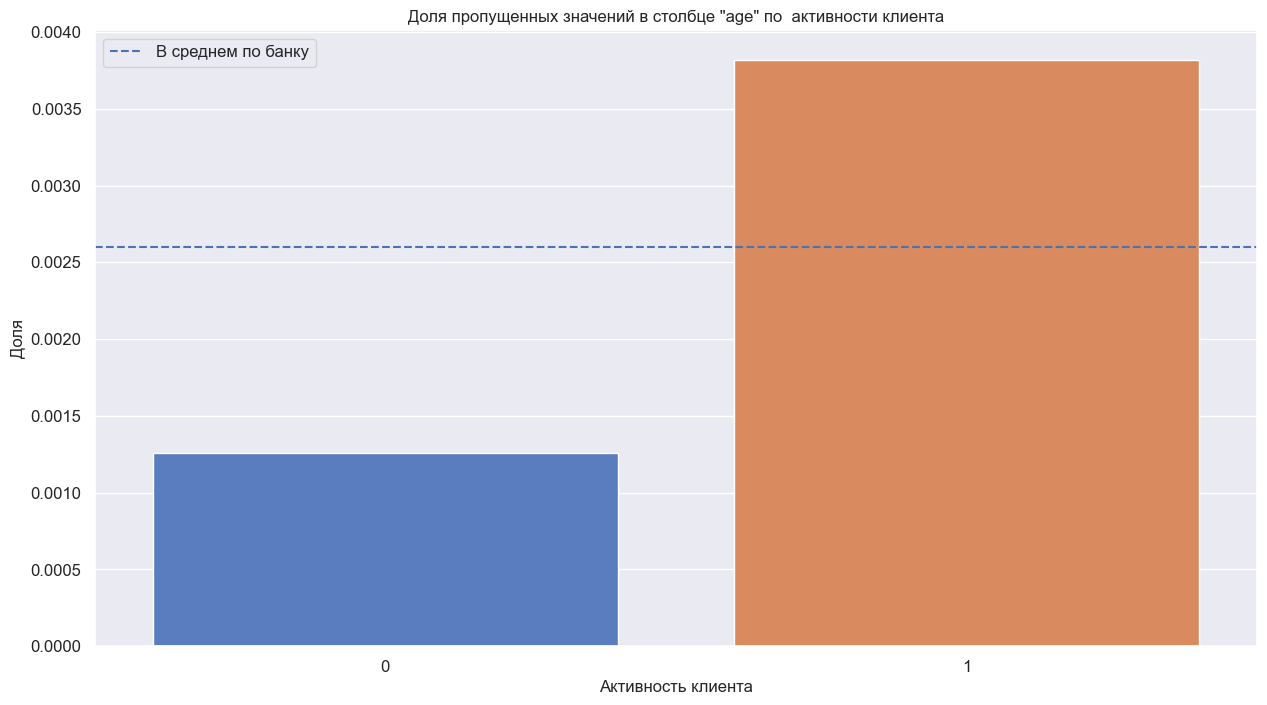

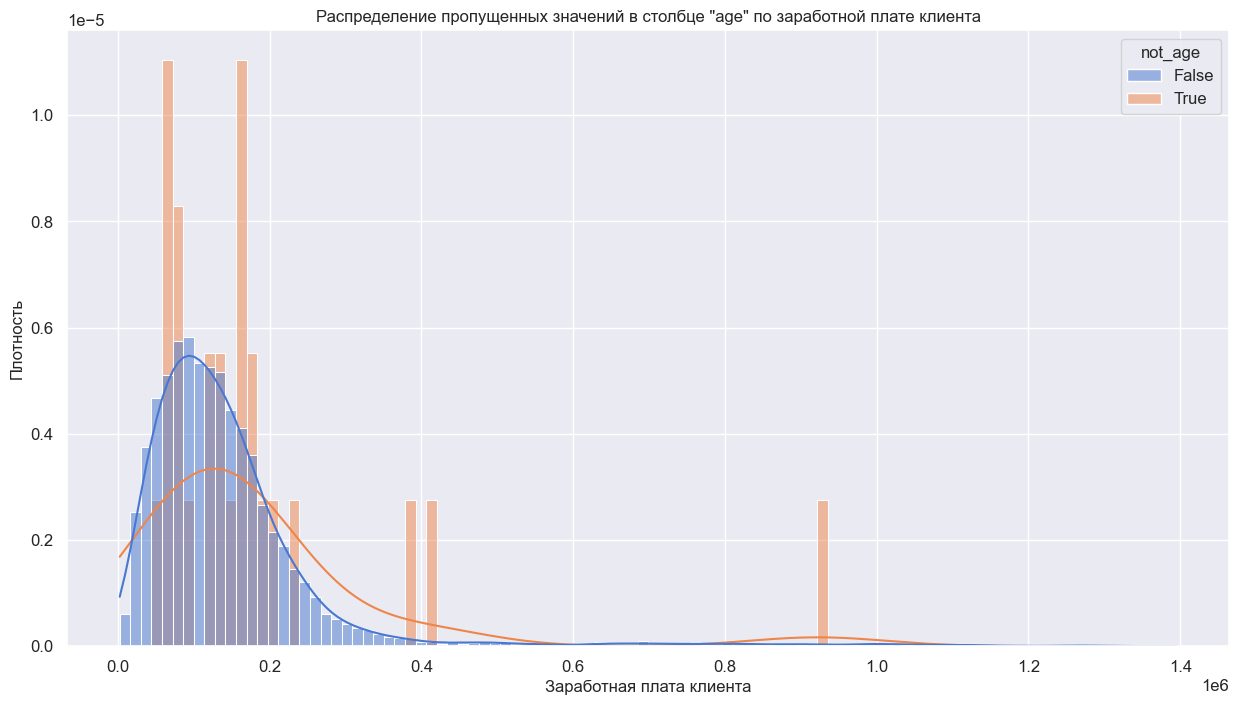

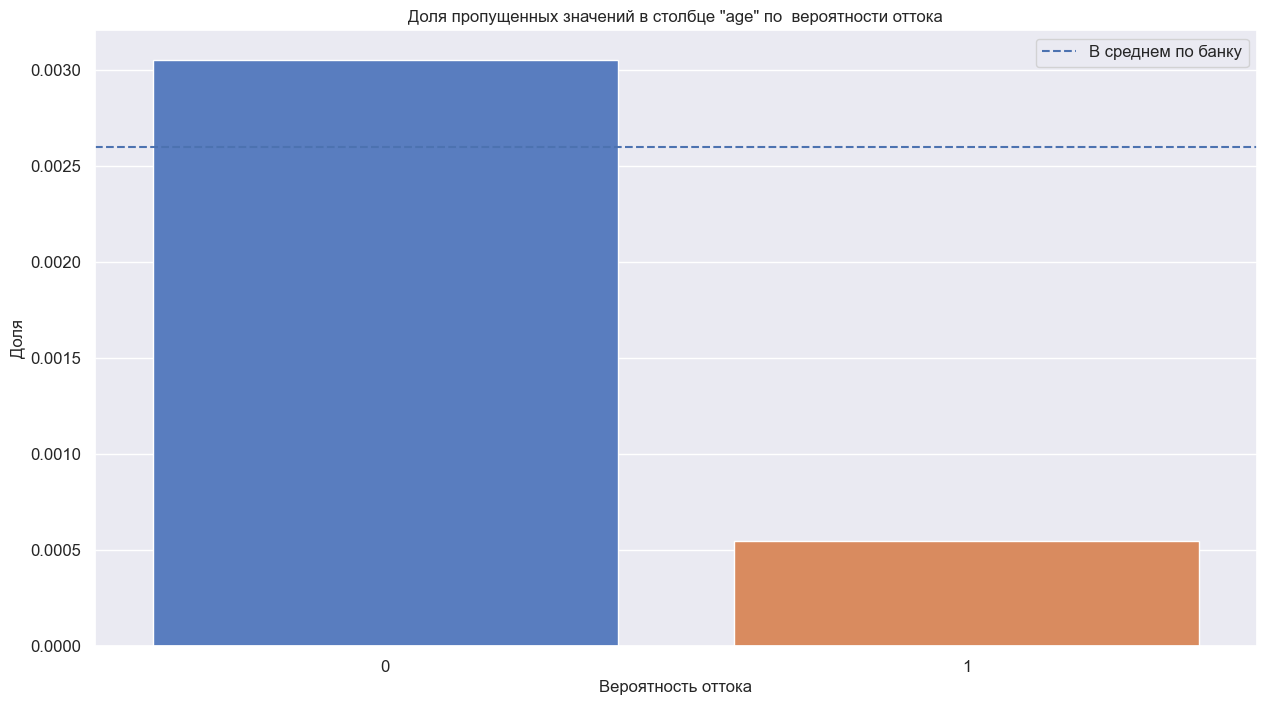

In [21]:
for i in data.drop(['user_id','age','not_age'], axis= 1).columns:
    group_visual(data, i, 'not_age', bins = 100)

Корректно определить природу пропусков и зависимость пропусков от значений какого либо из столбцов не удалось.  
Так как пропусков в столбце "age" менее 1 % и их удаление не скажется на результатах исследования, данные пропуски целесообразнее удалить.

In [22]:
data.dropna(subset = ['age'], inplace = True)

Также удалим вспомогательный столбец.

In [23]:
data.drop('not_age',axis = 1, inplace = True)

##### Работа с пропусками в столбце 'balance'

Так как пропуски в столбце 'balance' присутствуют практически в 23% строк датафрейма, необходимо изучить природу их возникновения, выявить закономерности.

Добавим в датафрейм булевый столбец, содержащий информацию заполнена ли  информация в столбце 'balance'.

In [24]:
data['not_balance'] = data['balance'].isna()

Воспользуемся объявленной ранее функции и визуализируем распределение признаков в зависимости от того, внесены ли значения в столбце с балансом на счете.

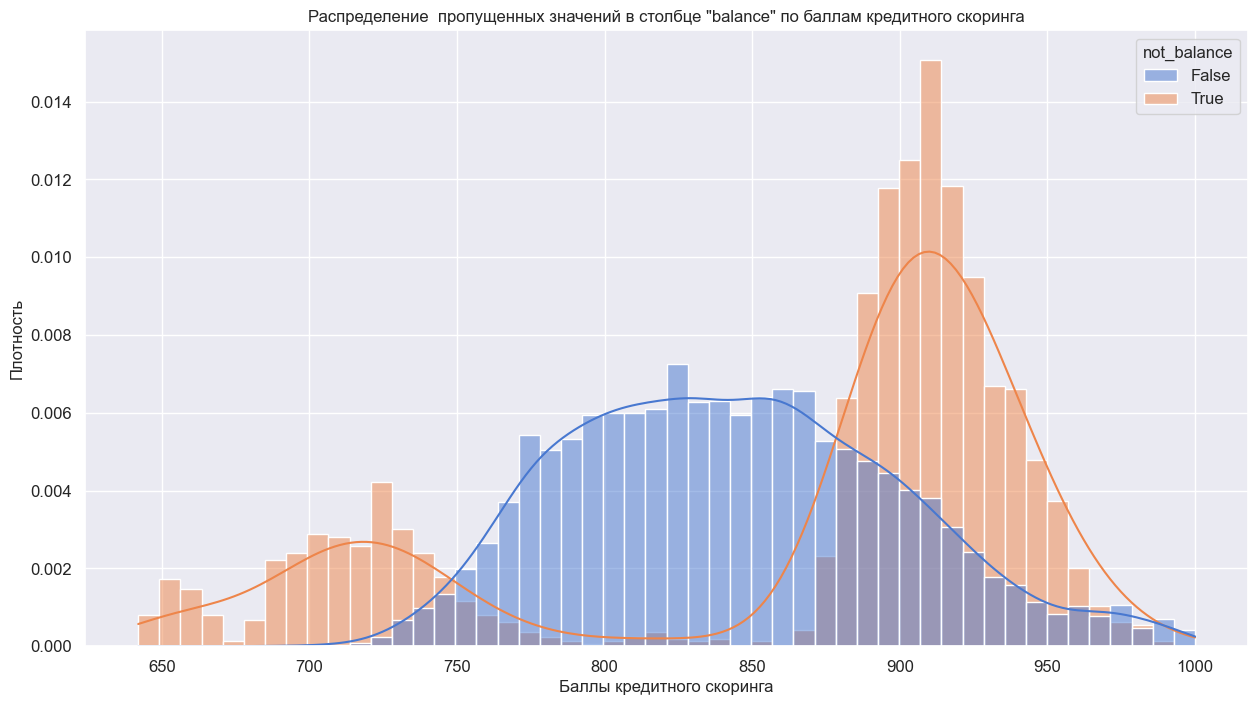

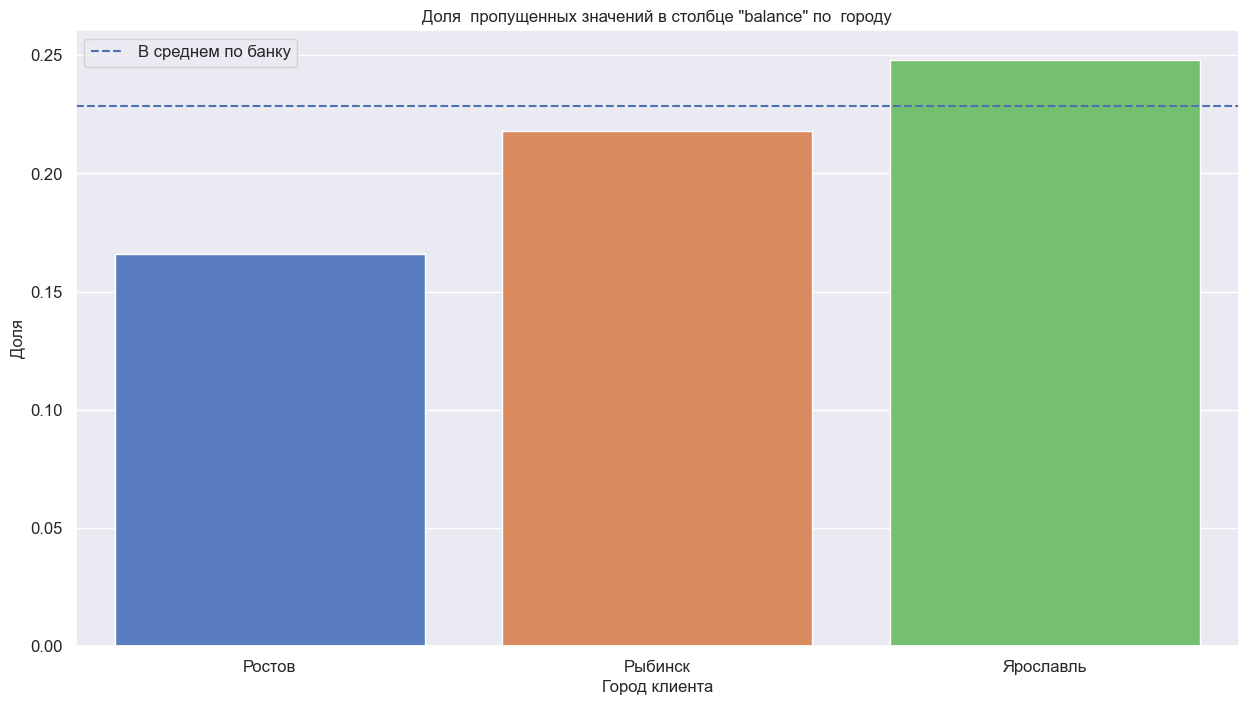

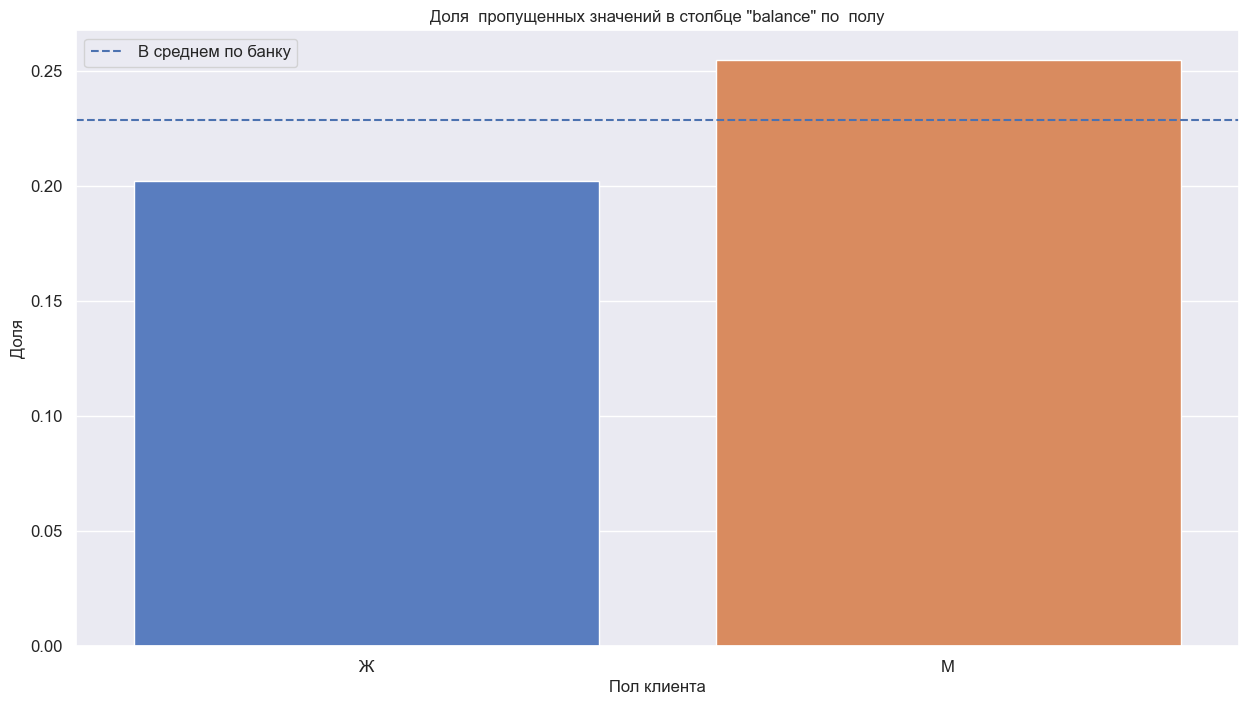

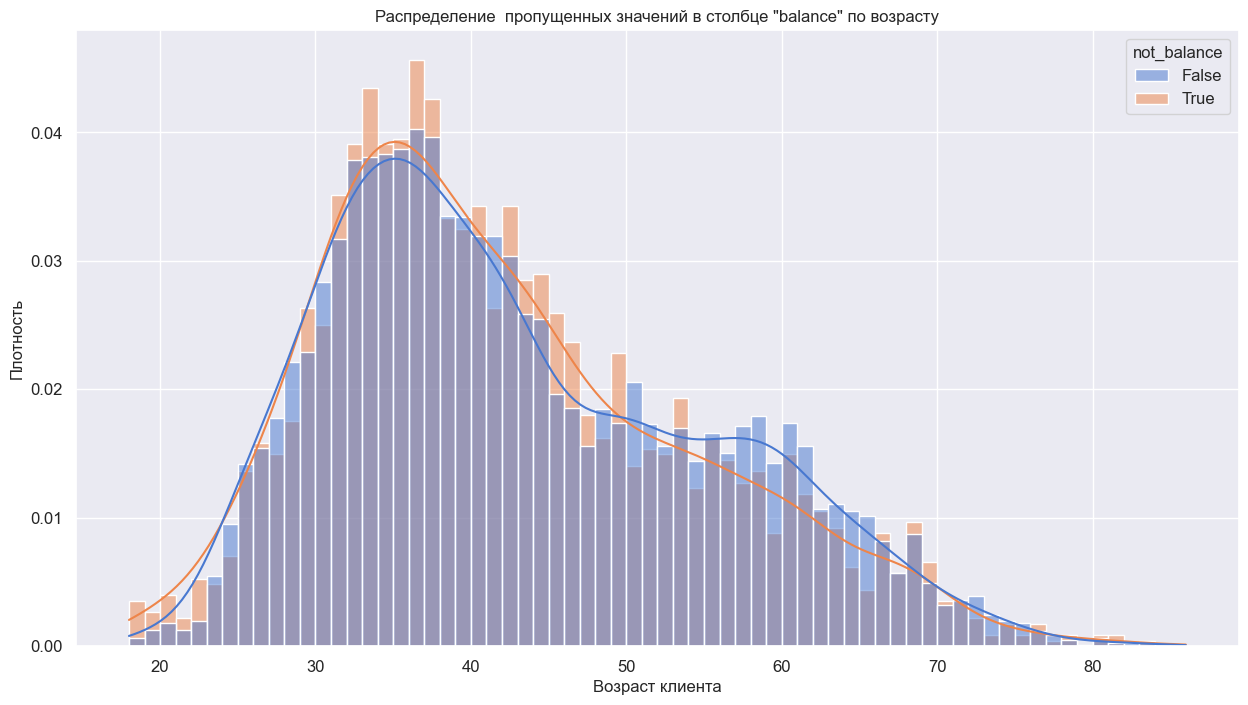

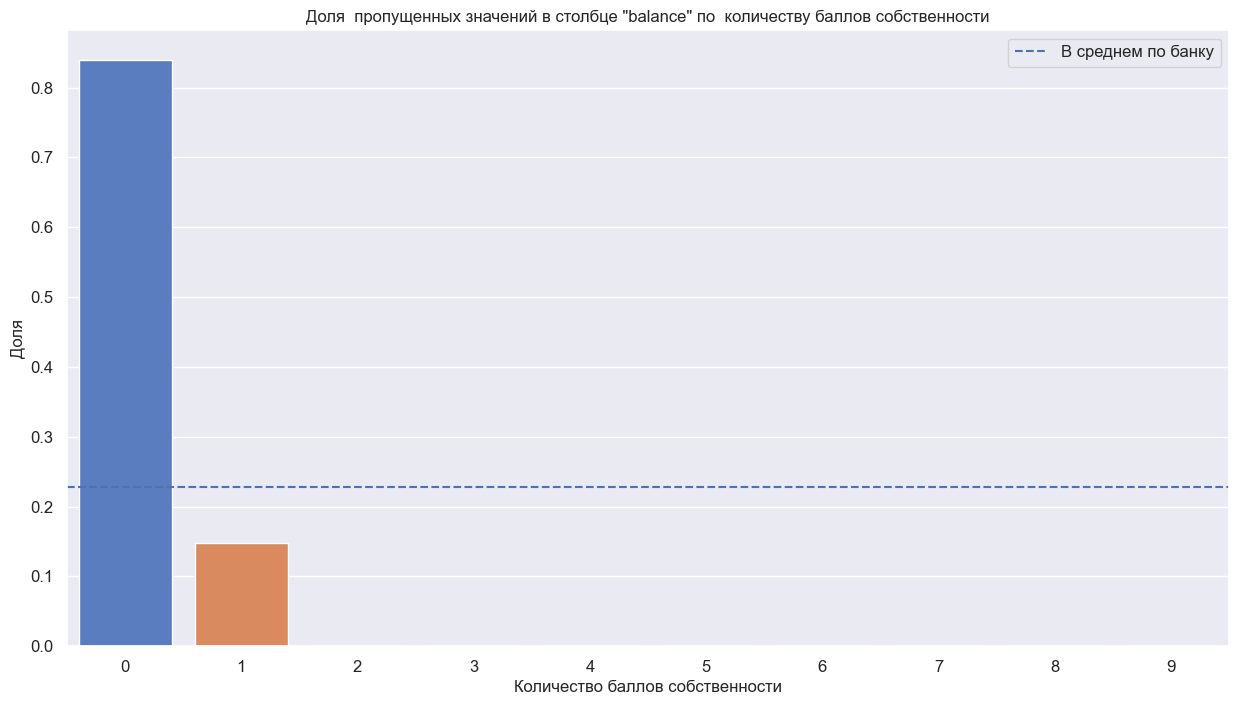

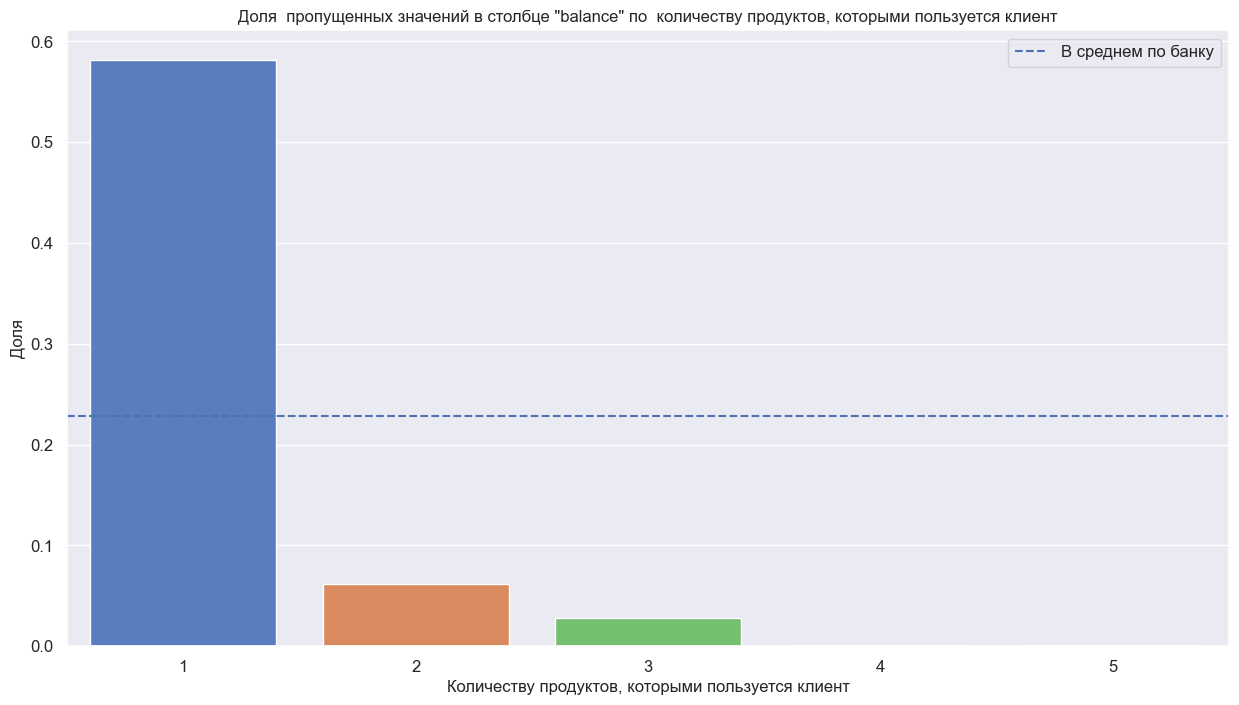

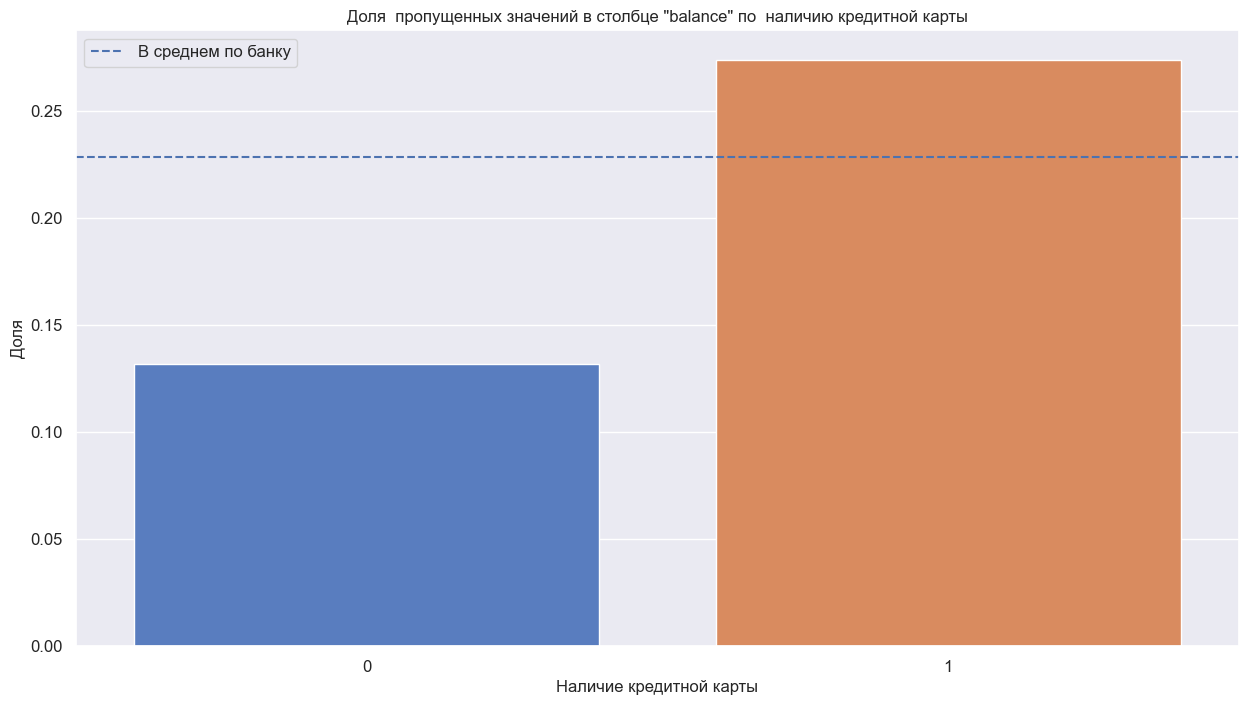

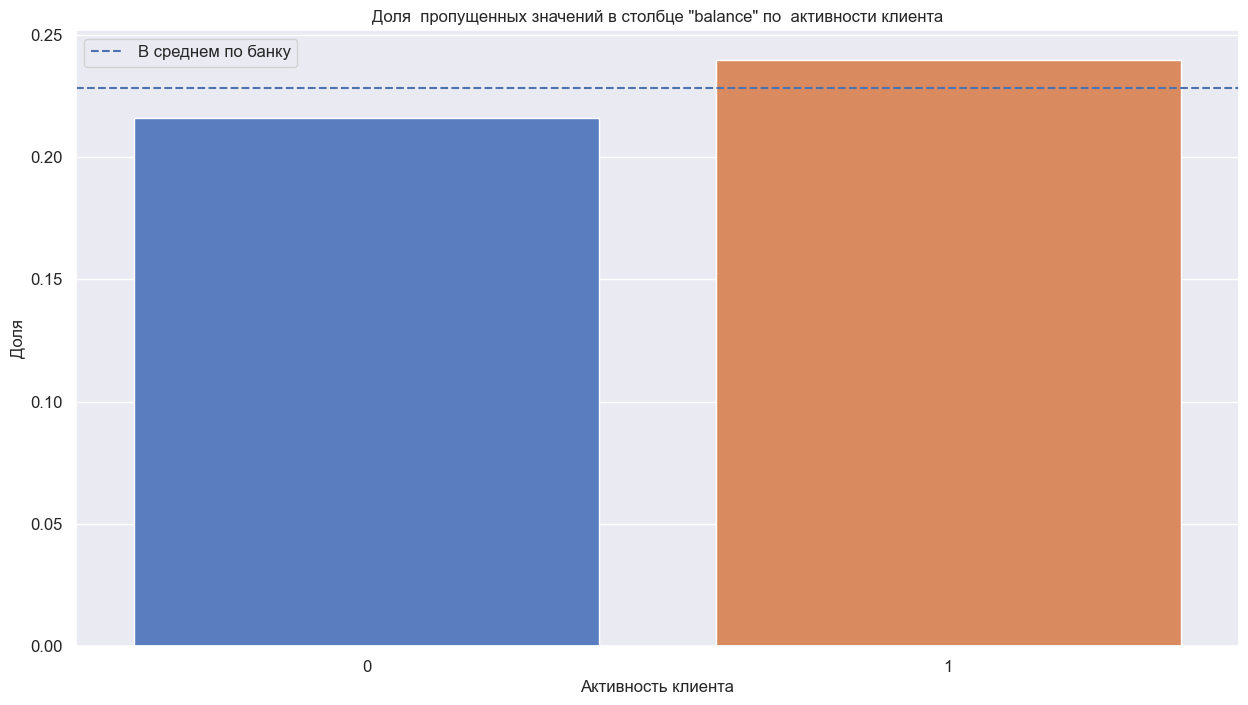

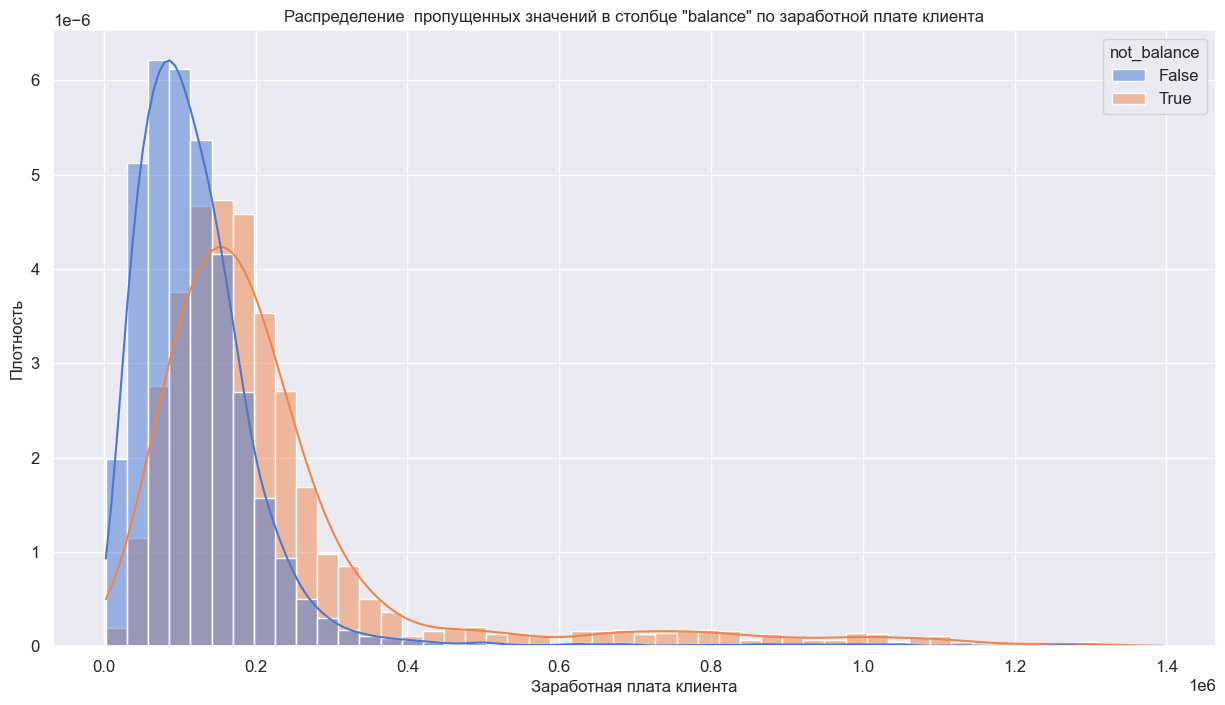

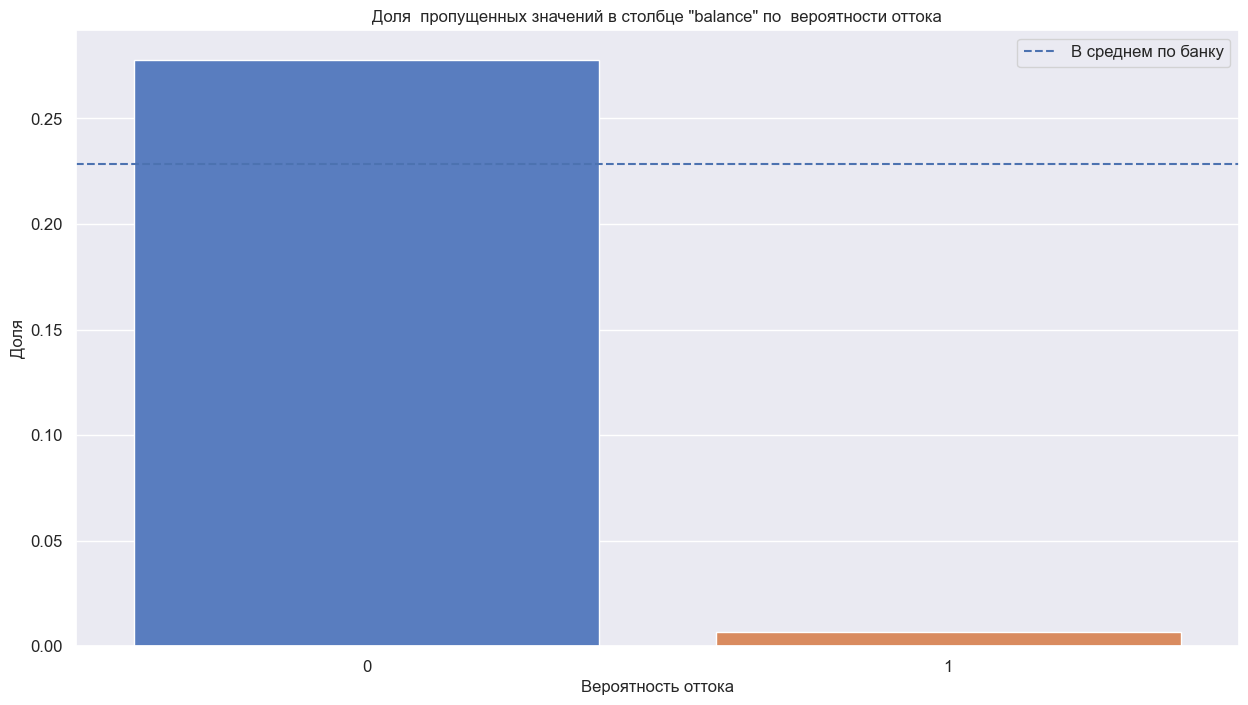

In [25]:
for i in data.drop(['user_id','balance','not_balance'], axis= 1).columns:
    group_visual(data, i, 'not_balance')

Анализ визуализации распределения пропущенных значений в столбце "balance" показывает зависимость наличия пропусков от значений практически каждого из исследуемых признаков.  
Объяснить взаимосвязи пропусков с данными не получается, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это может привести к заметным искажениям. Существует вероятность, что наличие пропущенных значений связано с каким либо из признаков, отсутствующих в данных - категория пропуска MNAR (Missing Not At Random / Отсутствует не случайно).
Можно предположить, что пропуски связаны с продуктами банка, не требующими открытия счета в банке.

#### Корректировка типов данных 

Приведем значения столбцов "age" и "score" в целочисленный тип и уточним корректность изменения типа вызовом метода info().

In [26]:
data['age'] = data['age'].astype('int')
data['score'] = data['score'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   int32  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int32  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
 12  not_balance    9973 non-null   bool   
dtypes: bool(1), float64(2), int32(2), int64(6), object(2)
memory usage: 944.7+ KB


Тип данных в столбцах изменен корректно.

#### Кодирование значений  переменных 

Создадим копию датасета для последующего рассчета корреляции при помощи библиотеки phik.

In [27]:
data_phik = data.drop(['not_balance'], axis = 1)

С целью дальнейшего исследование закодируем сначения столбцов с полом и городом проживания клиента.

Для исключения потери данных, созданим копии столбцов, подлежащих кодированию.

In [28]:
data['city_2'] = data['city']
data['gender_2'] = data['gender']

Закодируем столбцы с возрастом и полом клиента.

In [29]:
data = pd.get_dummies(data,columns = ['city_2', 'gender_2'])

Переименуем названия вновь образованных столбцов.

In [30]:
data.rename(columns = {'city_2_Ростов':'is_rostov',
                       'city_2_Рыбинск':'is_rybinsk',
                       'city_2_Ярославль':'is_yaroslavl',
                       'gender_2_Ж':'is_female',
                       'gender_2_М':'is_male'}, inplace = True)

Выведем первые 5 строк фрема для уточнения корректности кодирования данных.

In [31]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,not_balance,is_rostov,is_rybinsk,is_yaroslavl,is_female,is_male
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,False,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,False,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,True,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,False,0,0,1,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,False,0,0,1,0,1


Кодирование значений проведено корректно.

#### Проверка данных на наличие дубликатов

Уточним количество строк-дубликатов в целом по фрейму.

In [32]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют.  
При этом количество уникальных значений в столбце "user_id"  меньше количества строк в датафрейме, что предполагает наличие дублирования. Изучим строки фрейма с дублированными значениями данного столбца. 

Уточним количество строк с дублированными значениями в столбце на данном этапе предобработки.

In [33]:
data[data['user_id'].duplicated(keep=False)].shape[0]

100

Таких строк 100.
Визуально проанализируем первые 20 из дублированных строк.

In [34]:
data[data['user_id'].duplicated(keep=False)].sort_values('user_id').head(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,not_balance,is_rostov,is_rybinsk,is_yaroslavl,is_female,is_male
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1,False,0,1,0,1,0
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0,True,0,0,1,1,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1,False,0,1,0,1,0
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0,True,0,0,1,1,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1,False,0,1,0,1,0
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0,True,0,0,1,0,1
1411,123461,829,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1,False,0,0,1,1,0
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0,True,0,1,0,0,1
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0,False,0,1,0,1,0
8164,124450,859,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1,False,0,0,1,1,0


Визуализация не позволяет сделать вывод, что данные строки являются дубликатами. Так как значения остальных столбцов различаются. В первую очередь бросается в глаза различие по возрасту и полу, что говорит о том, что id-пользователя принадлежит разным клиентам.
При этом заметна разница в столбце 'churn'. 
Дополнительно проанализируем дубликаты по user_id и churn, чтобы уточнить наличие строк с одинаковым id, находящихся в одном статусе оттока,а также  по user_id, gender и age, чтоб уточнить потенциальное дублирование одного клиетна банка.

In [35]:
data[['user_id', 'churn']].duplicated(keep=False).sum()

0

Дублирование по id пользователя и статусу оттока пересечений не выявило. Строки, с одинаковым id клиента имеют разный статус оттока.

In [36]:
data[data[['user_id', 'gender', 'age']].duplicated(keep=False)].sort_values('user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,not_balance,is_rostov,is_rybinsk,is_yaroslavl,is_female,is_male
3274,155765,863,Ярославль,М,30,5,1036114.50,5,1,1,150744.50,1,False,0,0,1,0,1
5197,155765,923,Рыбинск,М,30,0,NaN,1,1,1,120296.60,0,True,0,1,0,0,1
8205,227795,840,Рыбинск,М,34,2,350768.03,1,1,0,102036.14,1,False,0,1,0,0,1
8497,227795,839,Ярославль,М,34,2,326593.14,2,1,0,103314.92,0,False,0,0,1,0,1


Анализ дубликатов по id, возрасту и полу выявил дублирование по двум id пользователя. По каждому из id имеются различия в городе проживания, значения остальных признаков не позволяют сделать вывод об однозначном дублировании, а также о то, какая из строк с одинаковым id является корректной, а какая подлежит удалению.

Дополнительно уточним наличие дублирования по id и городу.

In [37]:
data[['user_id', 'city']].duplicated(keep=False).sum()

0

**Выводы:**
Анализ строк с дублированными значениями в 	user_id позволяет заподозрить дублирование только по 2 id-пользователя.  
Причинами появления дублированных значений могут быть:
1. Плохая синхронизация баз банков, расположенных в разных городах, что может позволить назначить одинаковый id новым клиентам, зарегистрированным в банках разных городов.
2. Возможность назначения новому клиенту id пользователя, находящегося в статусе оттока.

Уточним количество  и долю строк, удаленных по итогам предобработки данных.

In [38]:
print(f'Удалено {(row_q - data.shape[0])}({((row_q - data.shape[0])/row_q):.1%}) строк от исходного датафрейма.')

Удалено 27(0.3%) строк от исходного датафрейма.


#### Вывод:
В рамках подготовки данных к анализу:
1. Удалена строка с нулевым значением в столбце с количеством продуктов банка, которыми пользуется клиент.
2. Проанализированы значения столбцов с оценочным доходом и балансом на счете клиента. 
3. Уточнена природа пропущенных значений в столбце с балансом. Принято решение пропуски не заполнять.
4. Значения столбцов "age" и "score" приведены в целочисленный тип.
5. Проиведено кодирование значений столбцов с полом('gender_2') и городом проживания клиента('city').
6. Данные проверены на наличие дубликатов. 

По итогам предобработки удалено 27(0.3%) строк от исходного датафрейма

### Исследовательский анализ данных:

#### Изучение распределения признаков в зависимости от оттока

In [39]:
print(f'Доля уходящих клиентов в среднем по банку составляет {data["churn"].mean():.1%}.')

Доля уходящих клиентов в среднем по банку составляет 18.2%.


Используем функцию и визуализируем распределение признаков в зависимости от статуса оттока клиентов.

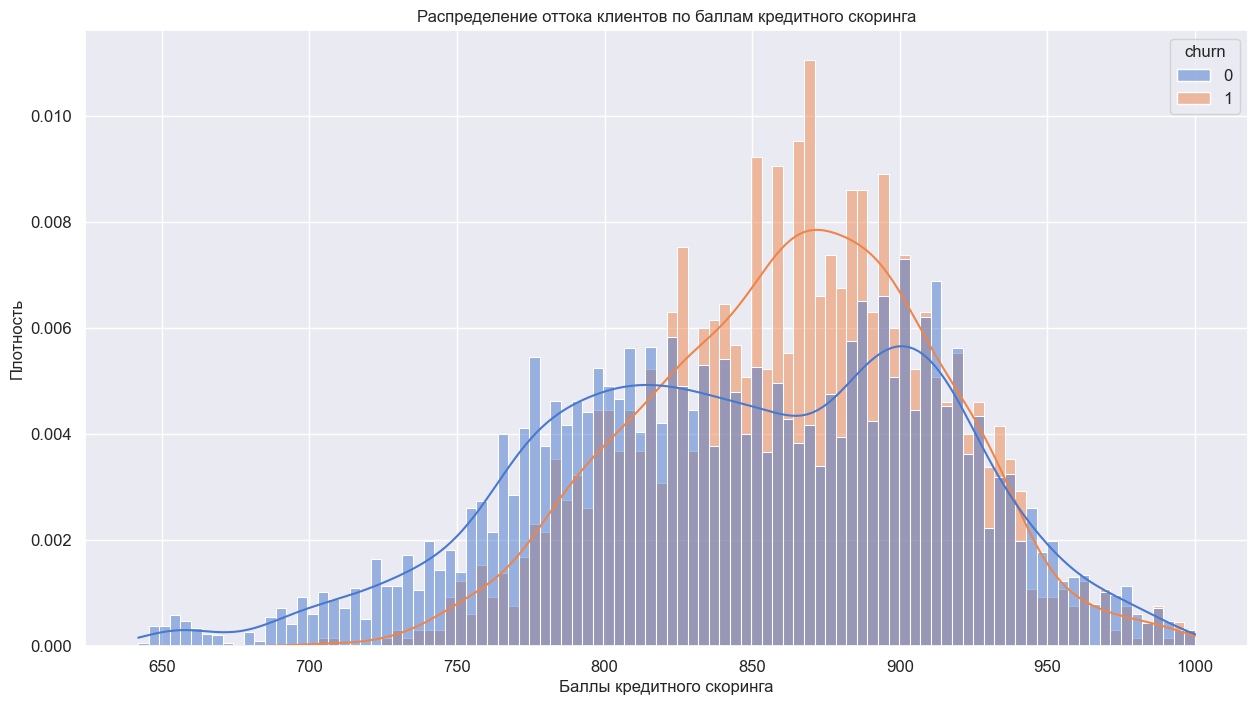

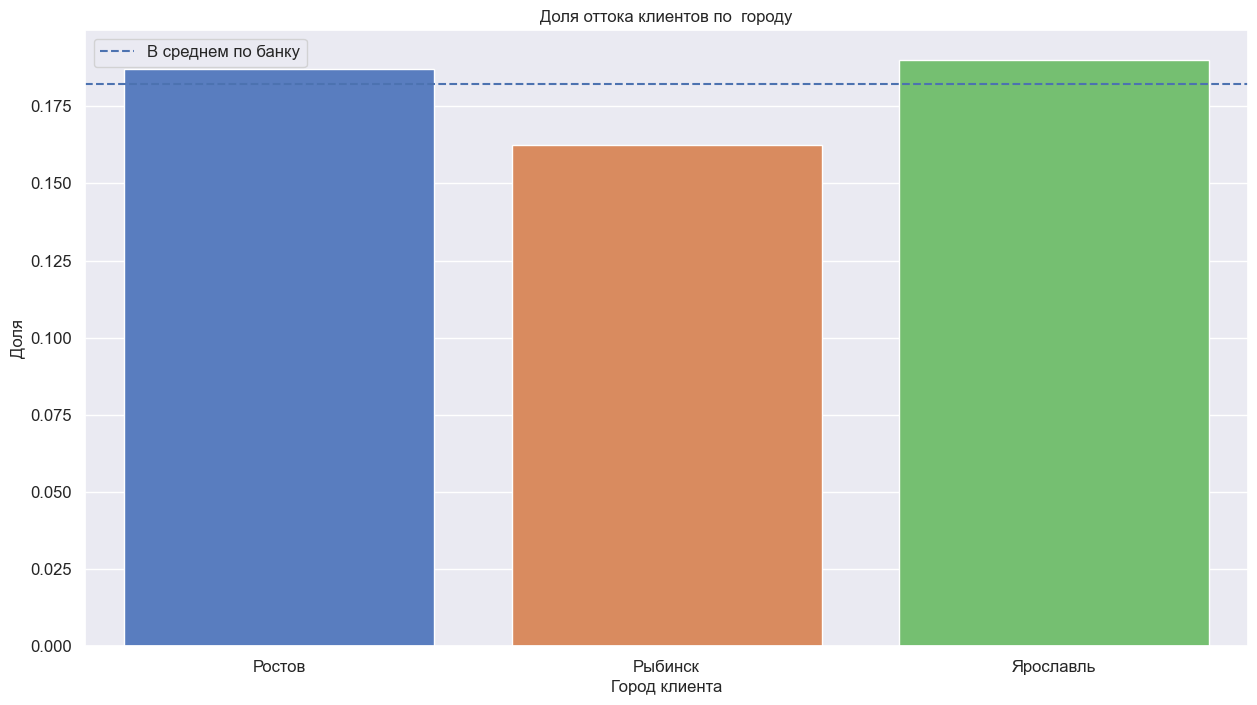

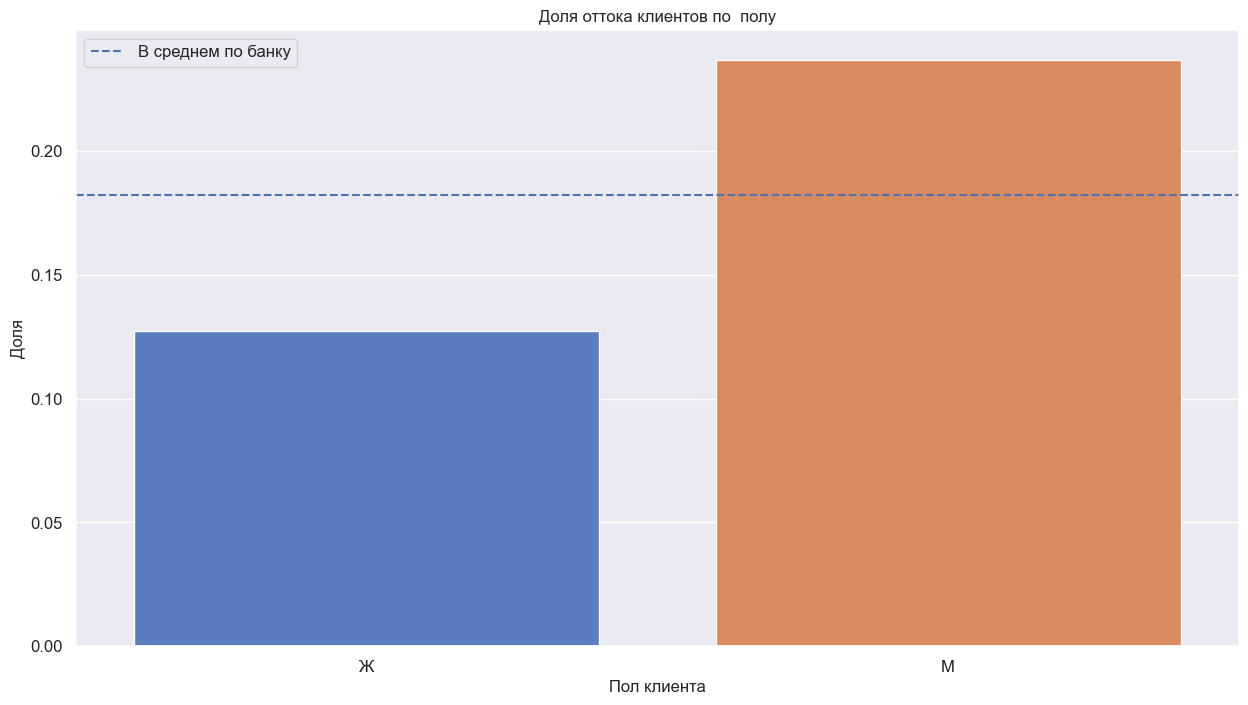

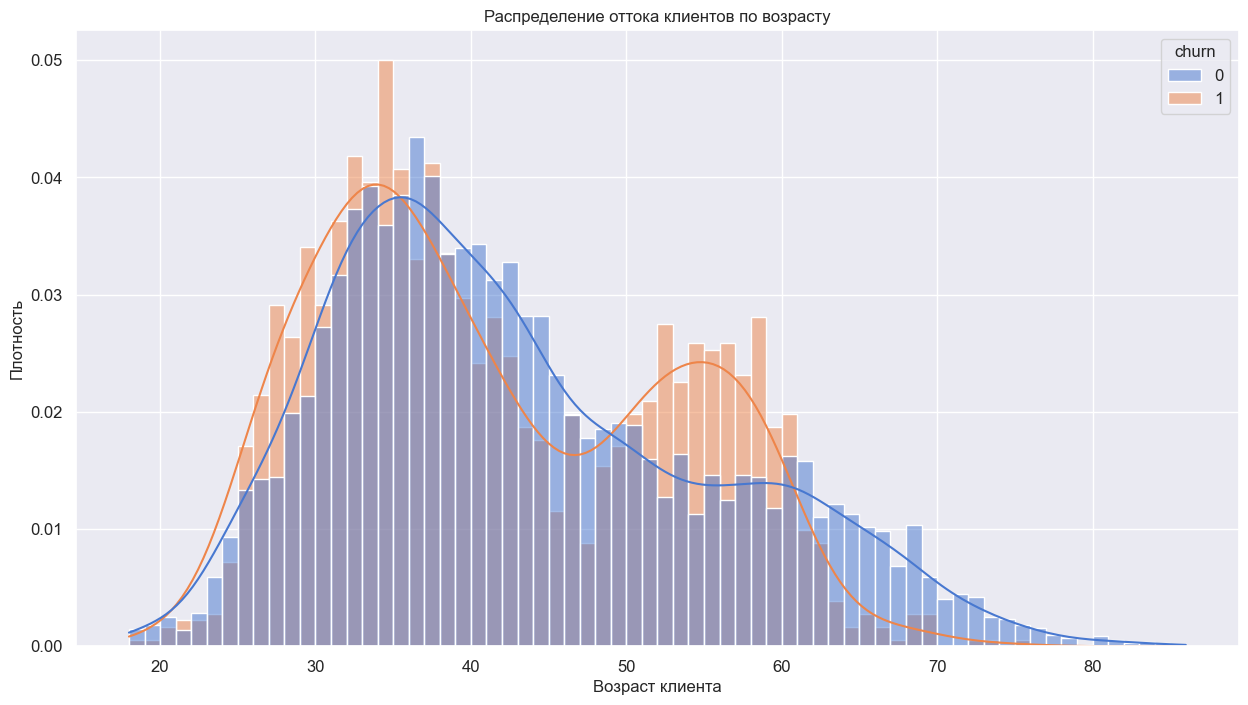

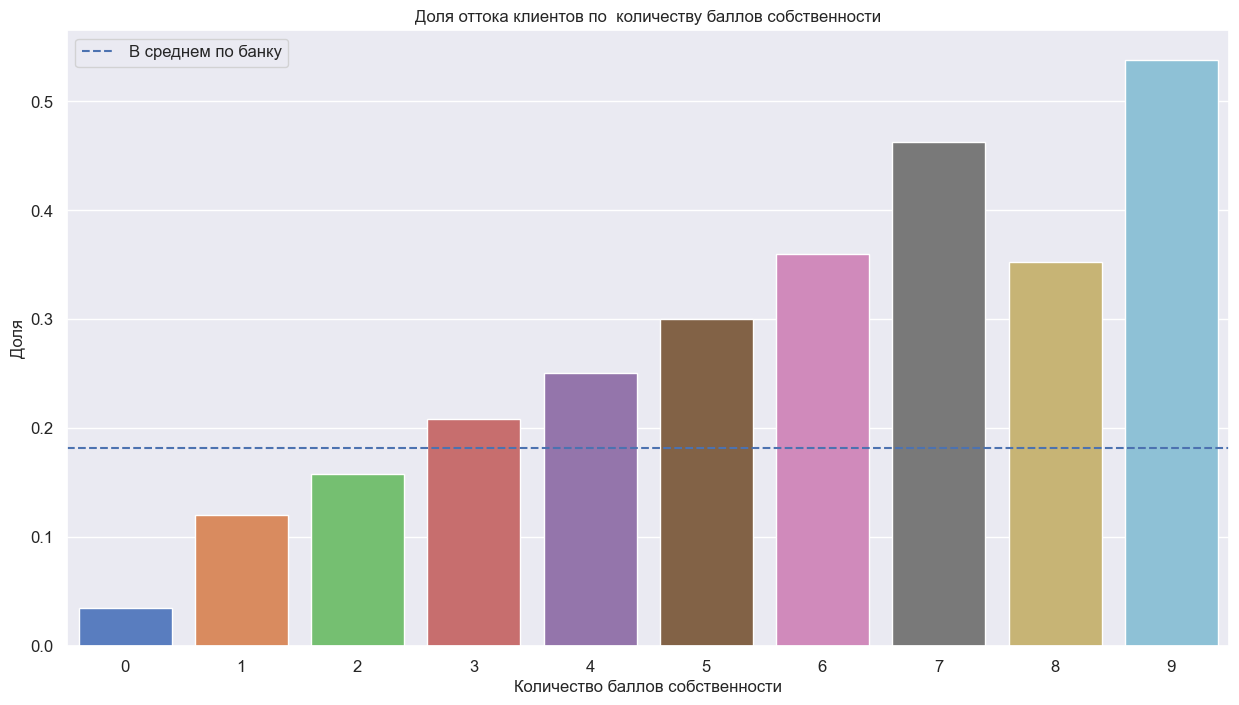

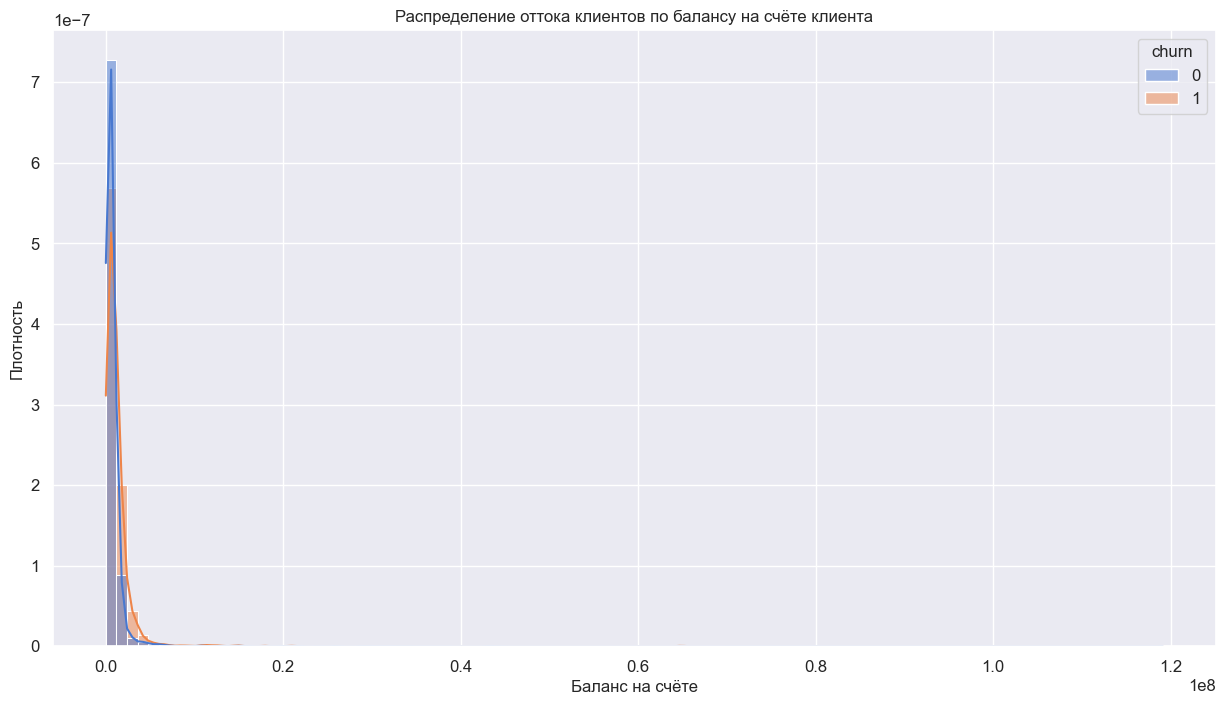

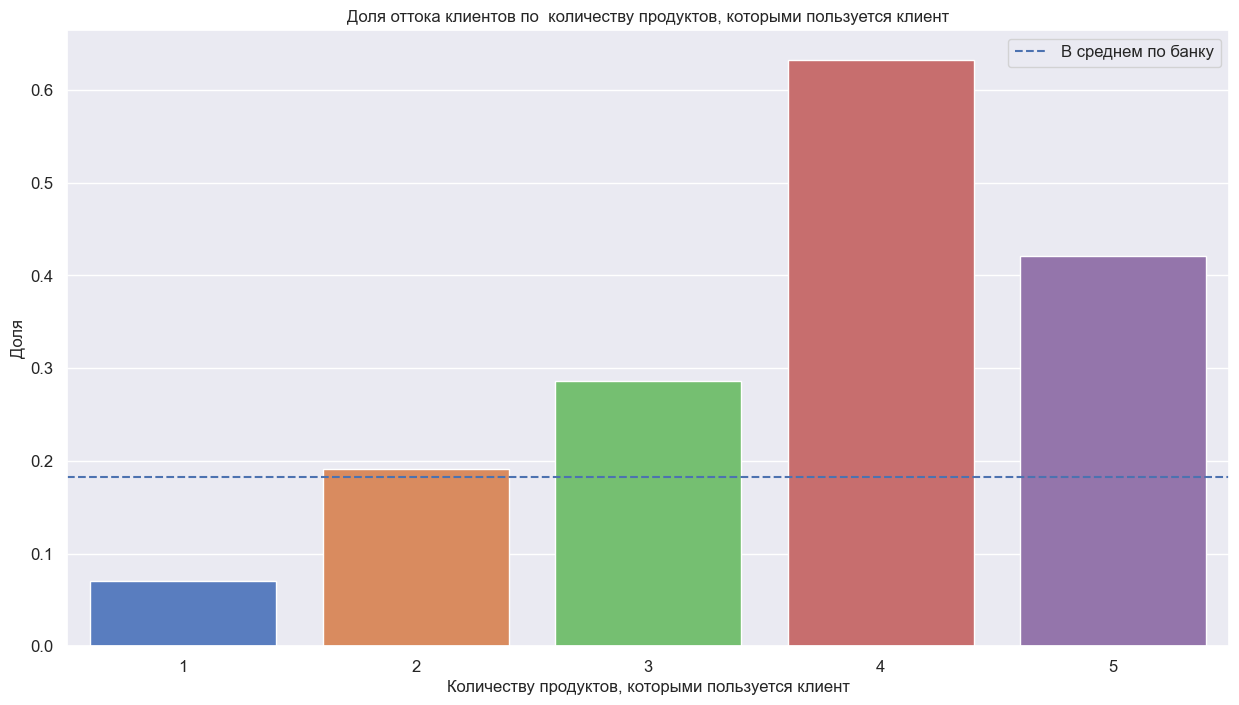

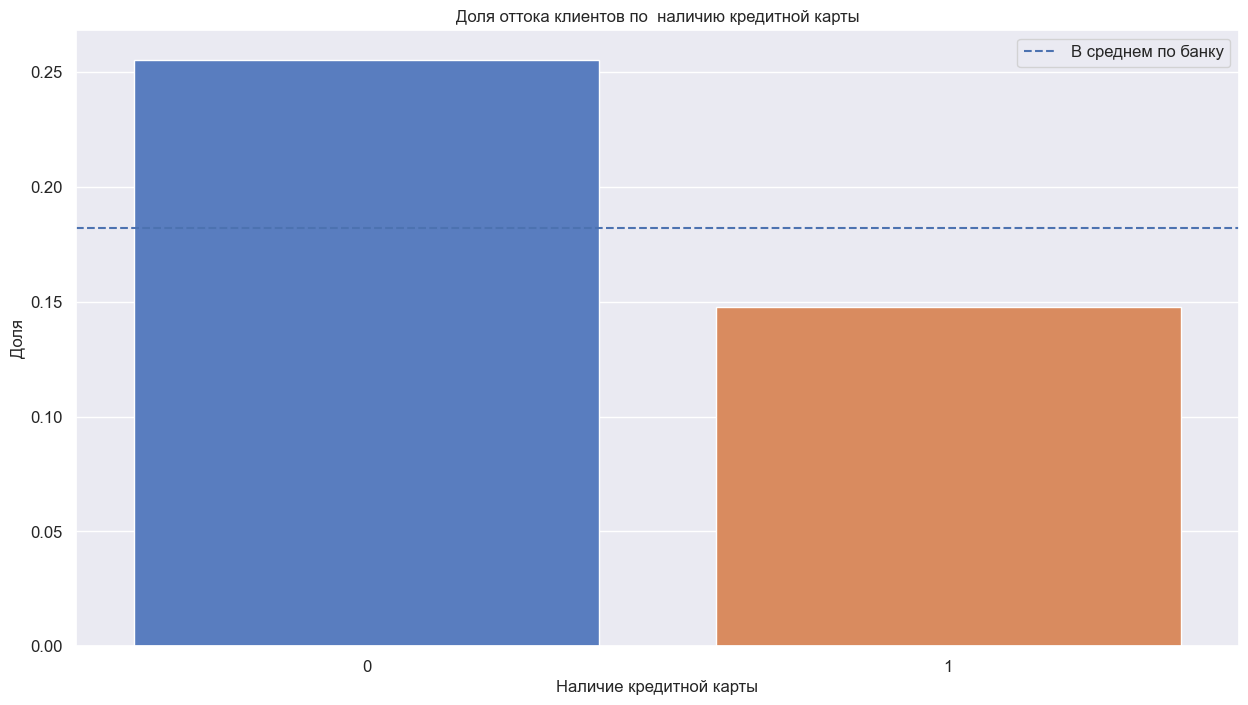

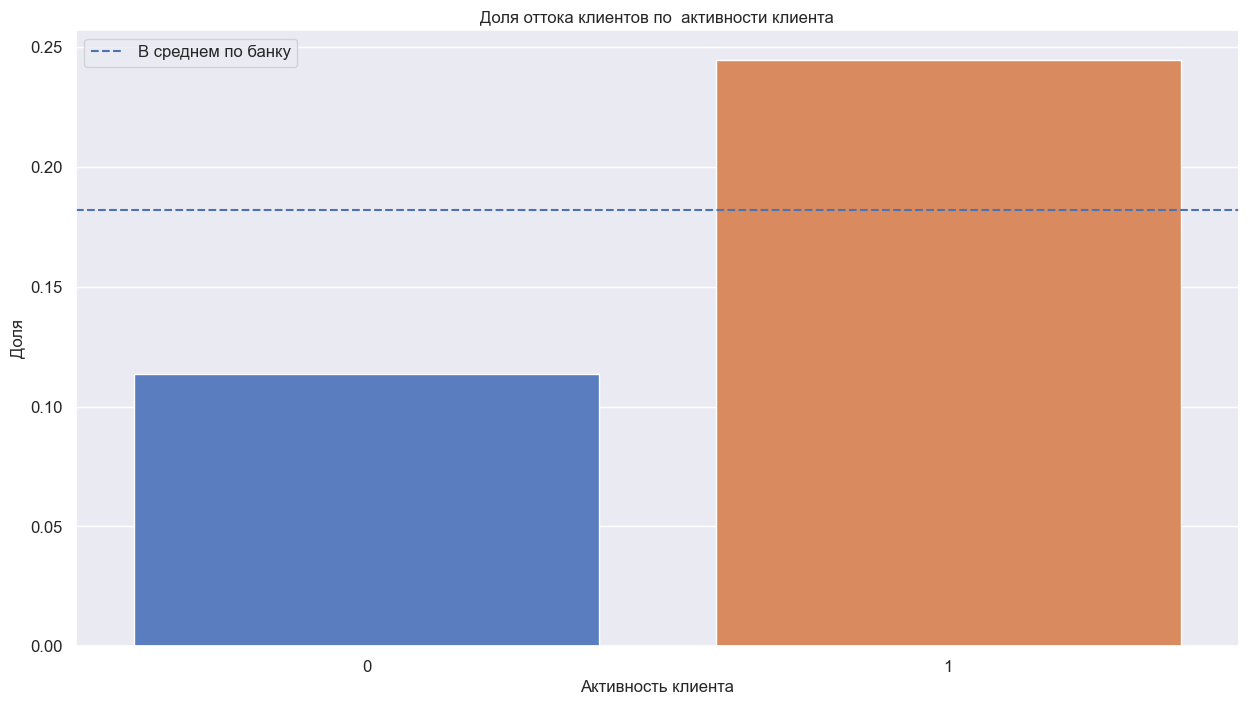

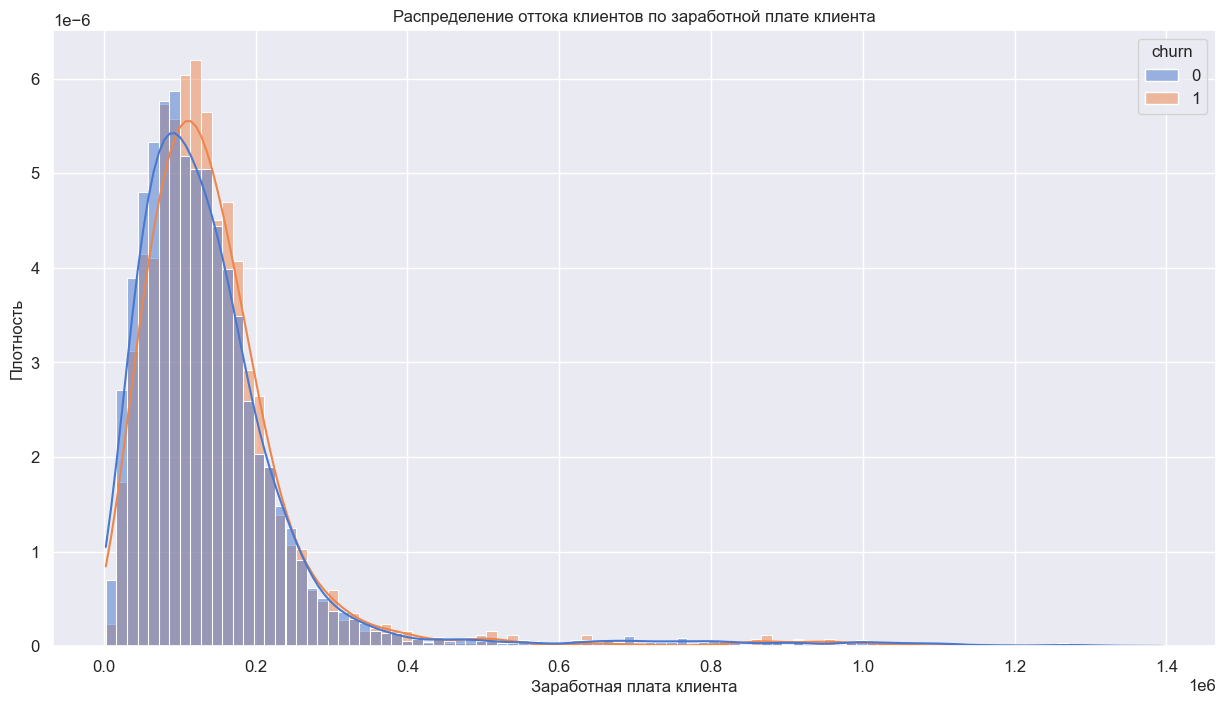

In [40]:
for i in data.drop(['user_id','churn', 'not_balance', 'is_rostov','is_rybinsk','is_yaroslavl','is_female','is_male'], axis= 1).columns:
    group_visual(data, i, 'churn', bins = 100)

Гистограммма распределения по столбцу "balance" из-за большого количества выбросов не показательна, поэтому дополнительно построим гистограммы по столбцу с ограничением диапазонов.

In [41]:
tmp = data.copy().assign(balance = data.balance.clip(0,3e10))

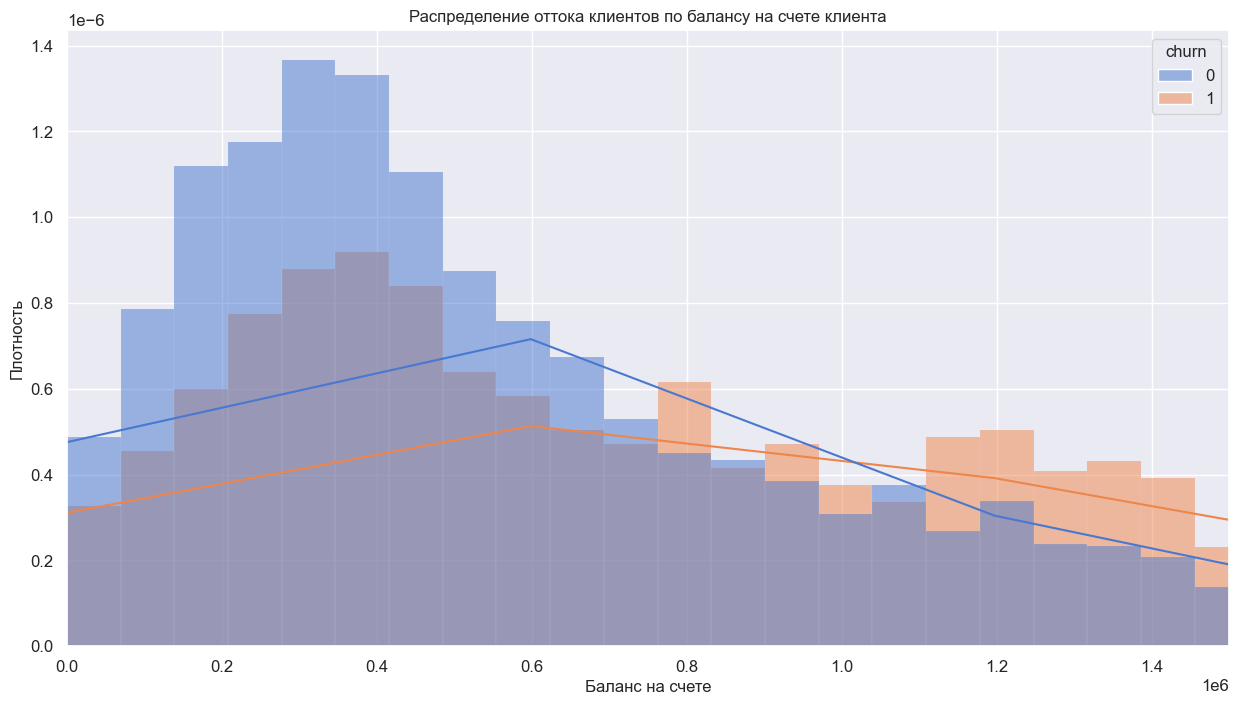

In [42]:
sns.histplot(data=tmp, x='balance', hue='churn',  stat='density', common_norm=False, kde=True)
plt.xlim(0, 1500000)
plt.title('Распределение оттока клиентов по балансу на счете клиента')
plt.xlabel('Баланс на счете')
plt.ylabel('Плотность')
plt.show()

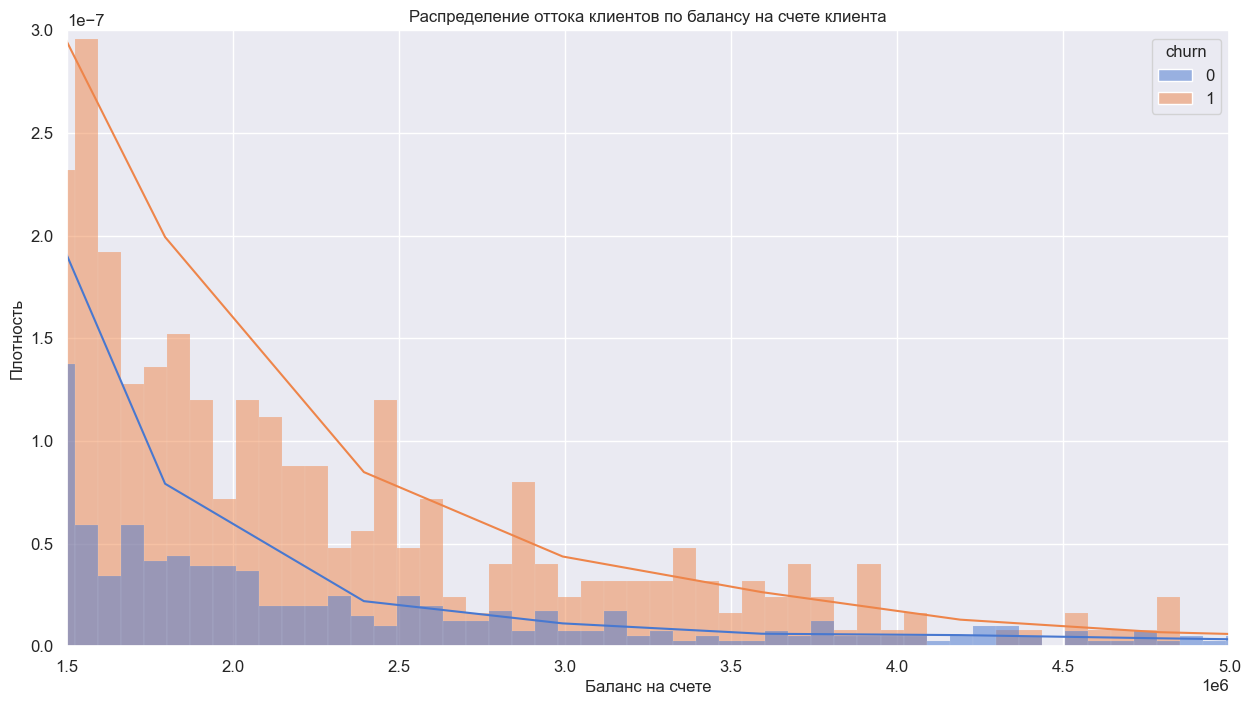

In [43]:
sns.histplot(data=tmp, x='balance', hue='churn',  stat='density', common_norm=False, kde=True)
plt.xlim(1500000, 5000000)
plt.title('Распределение оттока клиентов по балансу на счете клиента')
plt.xlabel('Баланс на счете')
plt.ylabel('Плотность')
plt.ylim(0, 3/ 10**7)
plt.show()

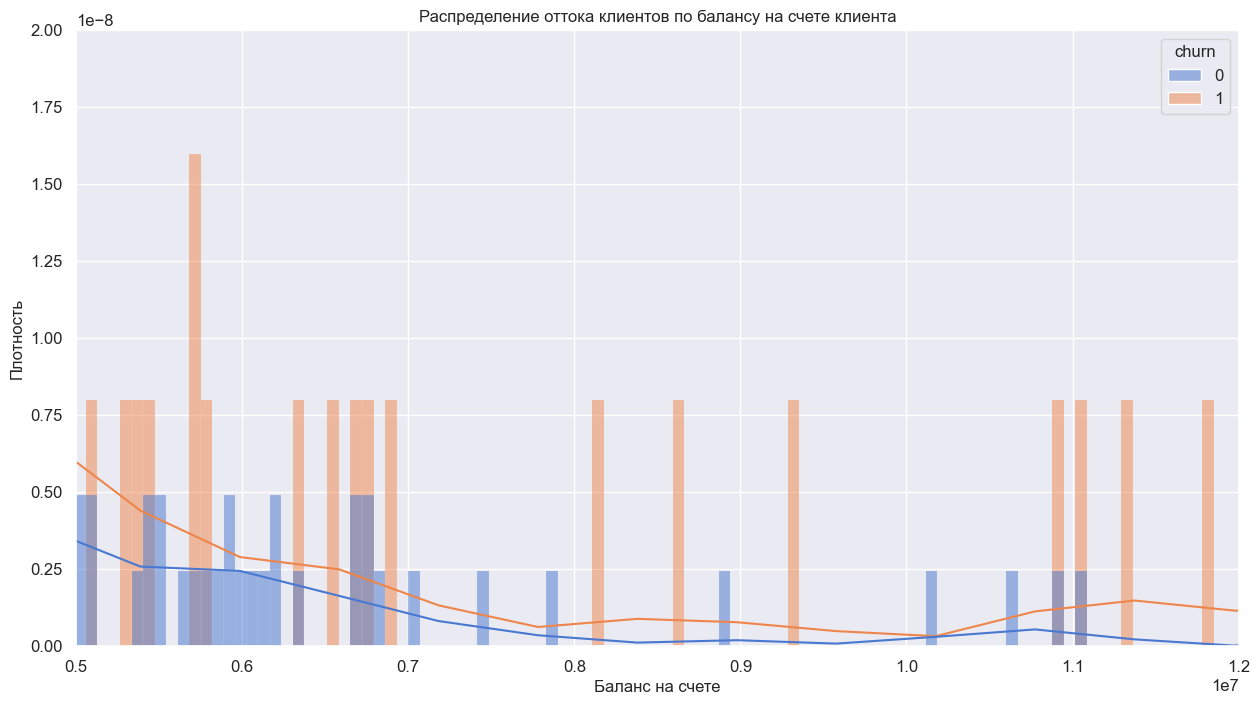

In [44]:
sns.histplot(data=tmp, x='balance', hue='churn',  stat='density', common_norm=False, kde=True)
plt.xlim(5000000, 12000000)
plt.title('Распределение оттока клиентов по балансу на счете клиента')
plt.xlabel('Баланс на счете')
plt.ylabel('Плотность')
plt.ylim(0,2*10**(-8))
plt.show()

Также по диапазонам рассмотрим и распределение дохода клиентов в зависимости от оттока.

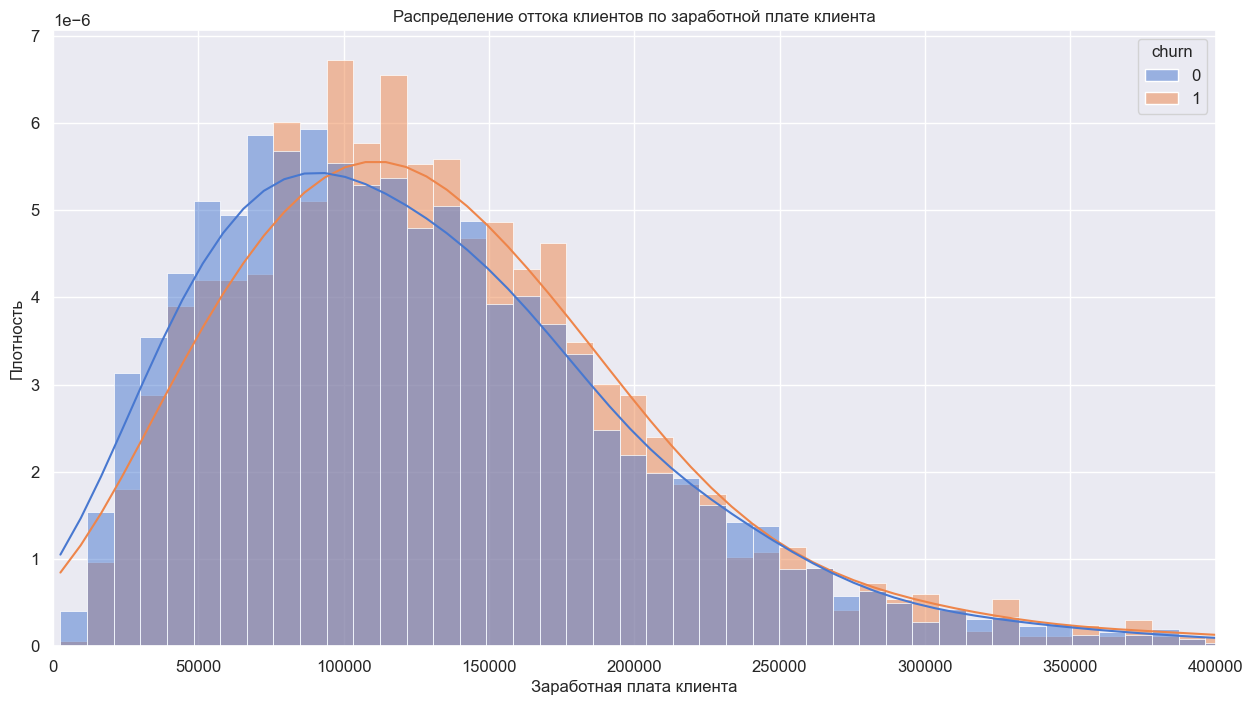

In [45]:
sns.histplot(data=tmp, x='est_salary', hue='churn', stat='density', common_norm=False, kde=True)
plt.xlim(0, 400000)
plt.title('Распределение оттока клиентов по заработной плате клиента')
plt.xlabel('Заработная плата клиента')
plt.ylabel('Плотность')
plt.show()

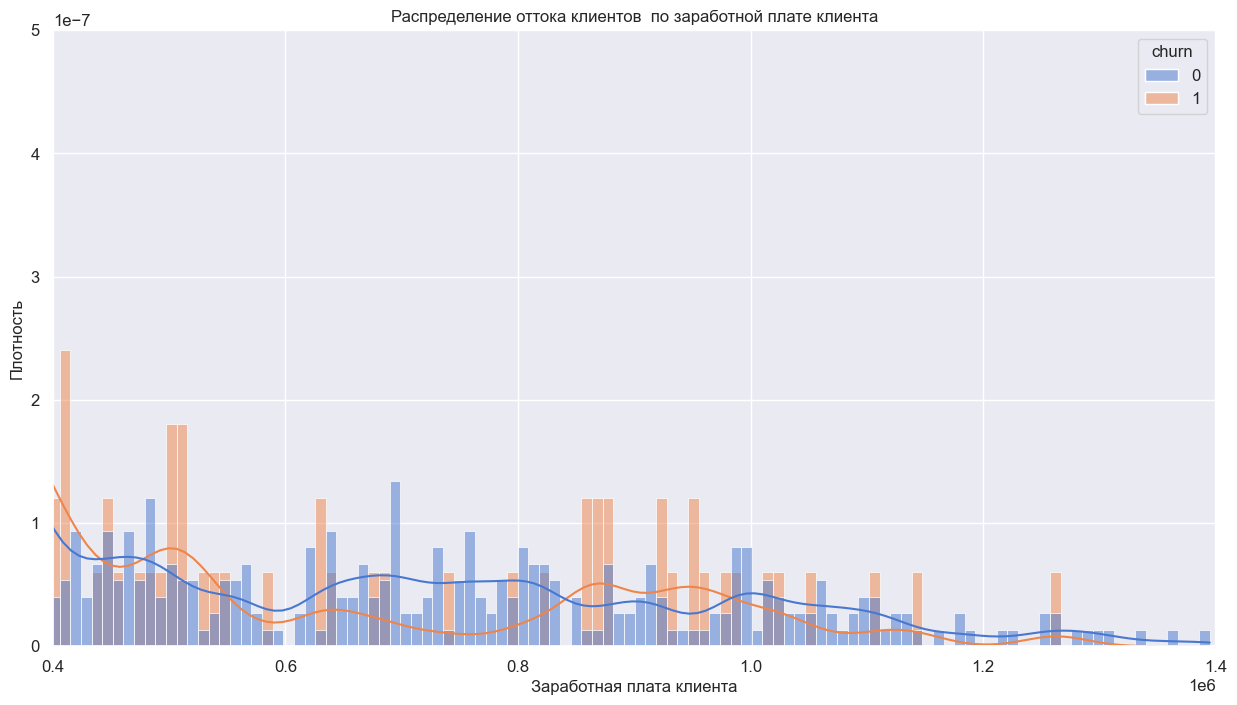

In [46]:
sns.histplot(data=tmp, x='est_salary', hue='churn',  stat='density', common_norm=False, kde=True)
plt.xlim(400000, 1400000)
plt.ylim(0,5/10**7)
plt.title('Распределение оттока клиентов  по заработной плате клиента')
plt.xlabel('Заработная плата клиента')
plt.ylabel('Плотность')
plt.show()

**Визуализация распределения признаков в зависимости от статуса оттока позволяет сделать следующие выводы:**
1. Доля уходящих  клиентов превышает долю оставшихся на интервале от  825 до 945 баллов кредитного рейтинга. У клиентов в более низким и более высоким рейтингом доля оставшихся клиентов превышает долю уходящих.
2. Доля уходящих клиентов в Ростове и Ярославле выше чем в среднем по банку и находится примерно на одном уровне(около 19%), в Рыбинске доля уходящих составляет чуть более 16%.
3. К уходу более склонны мужчины - практически 24%, у женщин данный показатель существенно ниже менее 13%.
4. Доля уходящих превышает долю оставшихся у клиентов в возрасте от 25 до 35 и от 49 до 60 лет. У клиентов остальных возрастов доля оставшихся клиентов превышает долю уходящих.
5. Количество баллов собственности и количество используемых клиентом продуктов банка прямо взаимосвязаны с вероятностью ухода клиента банка. 
6. У клиентов с балансом на счете до 1 миллиона рублей доля оставшихся клиентов превышает долю уходящих, с балансом на счете более 1 миллиона - доля уходящих превышает долю оставшихся.
7. У пользователей кредитных карт доля уходящих клиентов ниже, чем в среднем по банку - менее 15%, у неиспользующих кредитные карты доляя оттока составляет более 25%.
8. Активные клиенты более склонны к уходу - 24.5% уходящих, у неактивных пользователей доля оттока составляет чуть более 11%.
9. Доля уходящих превышает долю оставшихся у клиентов с доходом от 90 до 250, от 260 до 450 тысяч рублей. У клиентов c с прочим доходом доля оставшихся клиентов превышает долю уходящих. 

#### Категоризация и кодирование столбцов "age", "score" , "salary", "balance" 

Категоризируем значения столбцов в зависимости от оттока клиентов.

##### Столбец "age" (возраст клиента)

In [47]:
def categorize_age(age):
    try:
        if age <= 35:
            return '18_35'
        elif 36 <= age <= 48:
            return '36_48'
        elif 49 <= age <= 60:
            return '49_60'
        elif age >= 61:
            return '61_88'
        else:
            return 'uncategory'
    except:
        pass

In [48]:
data['age2'] = data['age'].apply(categorize_age)

##### Столбец "score" (баллы кредитного скоринга)

In [49]:
def categorize_score(score):
    try:
        if 0 <= score <= 820:
            return 'low'
        elif 821 <= score <= 945:
            return 'aver'
        elif score >= 946:
            return 'high'
        else:
            return 'uncategory'
    except:
        pass

In [50]:
data['score2'] = data['score'].apply(categorize_score)

##### Столбец "salary" (доход клиента)

In [51]:
def categorize_salary(salary):
    try:
        if 0 <= salary <= 90000:
            return 'I'
        elif 90001 <= salary <= 260000:
            return 'II'
        elif 260001 <= salary <= 450000:
            return 'III'
        elif 450001 <= salary:
            return 'IV'
        else:
            return 'uncategory'
    except:
        pass

In [52]:
data['salary2'] = data['est_salary'].apply(categorize_salary)

##### Столбец "balance" (баланс на счете)

In [53]:
def categorize_balance(balance):
    try:
        if 0 <= balance <= 1000000:
            return 'low'
        elif balance >= 1000001:
            return 'high'
        else:
            return 'uncategory'
    except:
        pass

In [54]:
data['balance2'] = data['balance'].apply(categorize_balance)

Оценим количество пользователей, попавших в каждую из категорий.

In [55]:
for i in ['age2','score2', 'salary2', 'balance2']:
    print(data.groupby(i).user_id.count())
    print()

age2
18_35    3291
36_48    3696
49_60    1954
61_88    1032
Name: user_id, dtype: int64

score2
aver    6076
high     500
low     3397
Name: user_id, dtype: int64

salary2
I      3341
II     5829
III     502
IV      301
Name: user_id, dtype: int64

balance2
high          1873
low           5822
uncategory    2278
Name: user_id, dtype: int64



Распределение по группам произведено корректно. 

##### Кодирование значений категориальных столбцов

Произведем кодирование категориальных столбцов.

In [56]:
data['equity2'] = data['equity']

In [57]:
data = pd.get_dummies(data,columns = ['age2','score2','salary2', 'balance2','equity2']) 

Оценим корректность кодирования столбцов.

In [58]:
display(data.head())
data.shape

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,equity2_0,equity2_1,equity2_2,equity2_3,equity2_4,equity2_5,equity2_6,equity2_7,equity2_8,equity2_9
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,...,0,1,0,0,0,0,0,0,0,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,...,0,0,0,0,0,1,0,0,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,...,0,0,0,0,0,1,0,0,0,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,...,0,0,0,0,0,1,0,0,0,0


(9973, 42)

Кодирование произведено корректно.

#### Cоставление портретов уходящих и неуходящих клиентов.

Составим портреты отточных и неотточных клиентов и расчитаем процентные различия в них.

In [59]:
df = data.pivot_table(index = 'churn', values = ['score',
                                                 'age',
                                                 'is_male',
                                                 'is_female',
                                                 'is_rostov',
                                                 'is_rybinsk',
                                                 'is_yaroslavl',
                                                 'equity',
                                                 'balance',
                                                 'products',
                                                 'credit_card',
                                                 'last_activity',
                                                 'est_salary'],
                      aggfunc = {'score':'median',
                                 'age':'median',
                                 'is_male':'mean',
                                 'is_female':'mean',
                                 'is_rostov':'mean',
                                 'is_rybinsk':'mean',
                                 'is_yaroslavl':'mean',
                                 'equity':'median',
                                 'balance':'median',
                                 'products':'mean',
                                 'credit_card': 'mean',
                                 'last_activity':'mean',
                                 'est_salary':'median'})

df.rename(columns = {'score':'Медианный рейтинг',
                     'is_male':'Доля мужчин',
                     'age':'Медианный возраст',
                     'is_female':'Доля женщин',
                     'is_rostov':'Доля жителей Ростова',
                     'is_rybinsk':'Доля жителей Рыбинска',
                     'is_yaroslavl':'Доля жителей Ярославля',
                     'equity':'Медианная оценка собственности',
                     'balance':'Медианный баланс на счете',
                     'products':'Медианное количество используемых продуктов',
                     'credit_card': 'Доля пользователей с кредитными картами',
                     'last_activity':'Доля активных пользователей',
                     'est_salary':'Медианная заработная плата'}, inplace = True) 

# Строки кода на случает замены значений на моду.Другой способ в голову не пришел.
#for i in df.index:
    #for j in ['equity']:
        #df.loc[i,j] = mode(data.query('churn == @i')[j])

df = df.T.reset_index()
df.columns = ['Признак','Неотточные клиенты', 'Отточные клиенты']
df = df[['Признак','Отточные клиенты','Неотточные клиенты',]]
df['Относительная разница, %'] = (df['Отточные клиенты'] -  df['Неотточные клиенты'])/ df['Неотточные клиенты'] *100
for i in df.drop(['Признак'], axis = 1).columns:
    df[i] = df[i].map(lambda x: round(x,3))
df = df.sort_values('Относительная разница, %', ascending = False, key = lambda x: abs(x)).reset_index(drop = True)
df   

,Признак,Отточные клиенты,Неотточные клиенты,"Относительная разница, %"
0,Медианный баланс на счете,783908.900,475410.090,64.891
1,Доля активных пользователей,0.702,0.483,45.461
2,Доля мужчин,0.651,0.467,39.354
3,Медианное количество используемых продуктов,2.377,1.759,35.159
4,Доля женщин,0.349,0.533,-34.474
5,Медианная оценка собственности,4.000,3.000,33.333
6,Доля пользователей с кредитными картами,0.552,0.709,-22.173
7,Доля жителей Рыбинска,0.240,0.275,-12.922
8,Медианная заработная плата,125408.880,118227.600,6.074
9,Доля жителей Ярославля,0.614,0.583,5.307


**Вывод:**
Значения большинства признаков между отточными и неотточными клиентами существенно различаются.
В рамках проверки гипотез предпологается проверить статистически различия в заработной плате среди отточных и неотточных клиентов, а также также различия долей жителей каждого города среди отточных и неотточных клиентов.

#### Корреляционный анализ

##### Корреляция Пирсона.

Построим и визуализируем матрицу корреляции Пирсона.

In [60]:
data_corr = data.drop(['user_id', 'score', 'balance', 'est_salary', 'not_balance', 'equity','products'], axis= 1).corr() #,'products', 'equity'

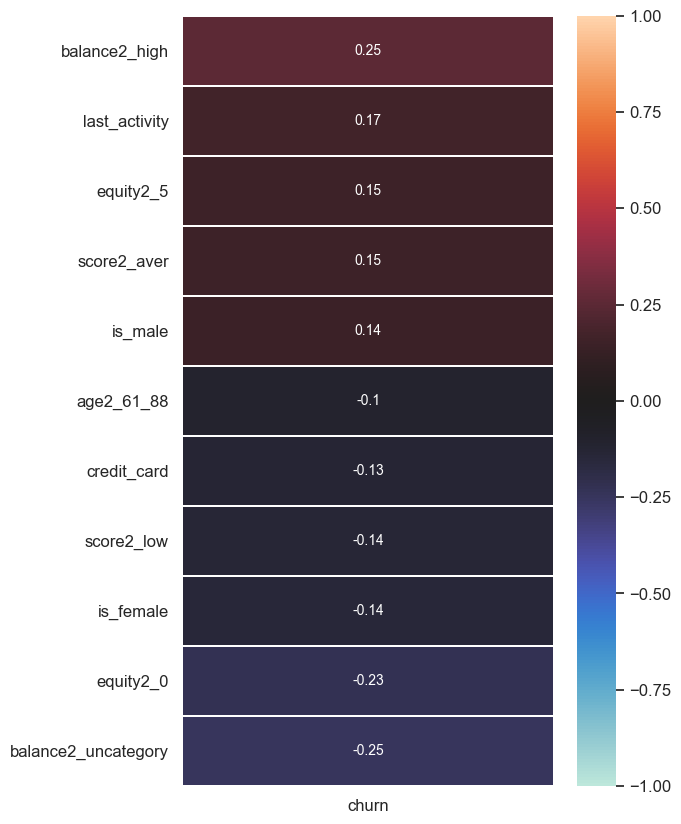

In [61]:
plt.figure(figsize=(6,10))
sns.heatmap(data_corr.loc[abs(data_corr['churn']) > 0.1, ['churn']].drop('churn').sort_values('churn', ascending = False),
            annot=True, vmin=-1, vmax=1, center= 0, linewidths=0.5);

##### Корреляция при помощи библиотеки phik

Построим и визуализируем матрицу корреляции.


data_phik.rename(columns = {'user_id': 'Идентификатор пользователя',
'score': 'Баллы кредитного скоринга',
'city': 'Город',
'gender': 'Пол',
'age': 'Возраст',
'equity': 'Количество баллов собственности',
'balance': 'Баланс на счёте',
'products':'Количество продуктов, которыми пользуется клиент',
'credit_card': 'Наличие кредитной карты',
'last_activity':'Активность клиента',
'est_salary':'Заработная плата клиента',
'churn':'Отток клиентов'}, inplace = True)

In [62]:
data_phik_matrix = data_phik.phik_matrix()

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


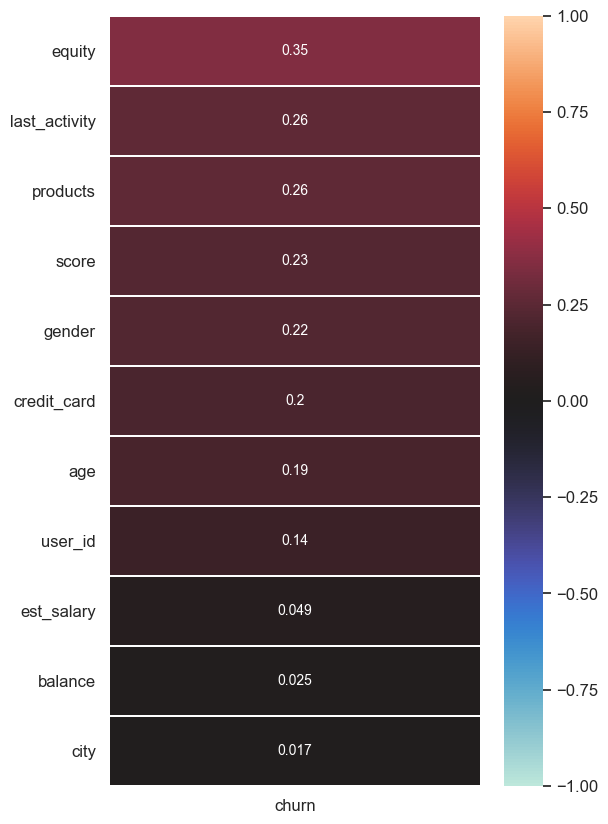

In [63]:
plt.figure(figsize=(6,10))
sns.heatmap(data_phik_matrix.loc[:,['churn']].drop('churn').sort_values('churn',key=abs,ascending = False),
            annot=True, vmin=-1, vmax=1, center= 0, linewidths=0.5)
plt.show();

##### Вывод:
Кореляционный анализ c использованием 2 методов показал схожие результаты:
1. Анализ с использованием библиотеки phik  показал наибольшую зависимость оттока клиентов от количества баллов собственности, активности клиента, количества используемых продуктов, кредитного рейтинга пола и наличия кредитной карты.
2. Корреляция Пирсона выявила, что наиболее склонны к оттоку следующие пользователи:
* имеющие высокий баланс на счете,
* активные клиенты, 
* имеющие 5 быллов оценки собственности,
* имеющие средний кредитный рейтинг,
* мужчины.

Результаты анализа при помощи библиотеки phik будут использованы при формировании целевых сегментов пользователей.

### Формулировка и проверка статистических гипотез

#### Гипотеза о различии дохода между теми клиентами, которые ушли и теми, которые остались

Сформируем  гипотезы:

H_0: Доход (est_salary) уходящих пользователей = Доход (est_salary) остающихся пользователей`

H_1: Доход (est_salary) уходящих пользователей ≠ Доход (est_salary) остающихся пользователей`

alpha = 0.05

##### Проверка гипотезы  t-критерием Стьюдента

In [64]:
results = st.ttest_ind(data[data['churn'] == 1]['est_salary']
                       , data[data['churn'] != 1]['est_salary']
                       , equal_var = False
)
# alpha = задайте значение уровня значимости
alpha  = 0.05
# вывод значения p-value на экран 
print('p-value:', results.pvalue)
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 0.8354803526840116
Не получилось отвергнуть нулевую гипотезу


##### Проверка гипотезы  U-критерием Манна-Уитни

In [65]:
results = st.mannwhitneyu(data[data['churn'] == 1]['est_salary']
                       , data[data['churn'] != 1]['est_salary'])
# alpha = задайте значение уровня значимости
alpha  = 0.05
# вывод значения p-value на экран 
print('p-value:', results.pvalue)
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.00016830729188229058
Отвергаем нулевую гипотезу


##### Вывод: 
В результате проверки гипотезы 2 критериями получили следующие результаты:
1. T-критерий Стьюдента - p-value: 0.83548. Оснований отвергнуть нулевую гипотезу нет.
2. U-критерем Манна-Уитни p-value: 0.00017. Есть основания отвергнуть нулевую гипотезу.

Различе в результатах проверки обуславливается тем, что в столбце 'est_salary' имеются выбросы. Распределение отличается от нормального. А так как непараметрический U-критерий Манна -Уитни не столь чувствителен к наличию выбросов по сравнению с t-тестом, ориентируемся на результаты проверки гипотезы U - критерием.
Гипотеза о различии дохода между теми клиентами, которые ушли и теми, которые остались нашла свое подтверждение.

#### Гипотезы  различии долей жителей городов среди уходящих и неуходящих пользователей.

Объявим функцию, которая при помощи Z-теста, проверяет статистические гипотезы о равенстве(различии) долей  жителей городов среди уходящих и неуходящих пользователей.

In [66]:
def statistics(data, columns, alpha = .05):
    dist_city = {'is_yaroslavl':'из Ярославля',
                 'is_rostov':'из Рыбинска',
                 'is_rybinsk':'из Ростова'}
    # пропорция успехов в 1 группе:
    p1 = data[data['churn']==1][columns].mean()
    # пропорция успехов во второй группе:
    p2 = data[data['churn']==0][columns].mean()
    # пропорция успехов в комбинированном датасете:
    p_combined = ((data[data['churn']==1][columns].sum() + data[data['churn']==0][columns].sum()) /data.shape[0])
       # разница пропорций в датасетах
    difference = p1 - p2
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) *\
                                    (1/data[data['churn']==1].shape[0] + 1/data[data['churn']==0].shape[0] ))
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print(f'Гипотезы:\nH_0: Доля клиентов из {dist_city[columns]} среди уходящих = Доля клиентов из {dist_city[columns]} среди остающихся')
    print(f'H_1: Доля клиентов из {dist_city[columns]} среди уходящих ≠ Доля клиентов из {dist_city[columns]} среди остающихся\nalpha = 0.05')
    print(f'p_value: {p_value}')
    if (p_value < alpha):
        print("Есть основания отвергнуть нулевую гипотезу: между долями есть значимая разница.")
    else:
        print("Оснований для отвержения нулевой гипотезы нет,  доли статистически не различаются.")
    print()

Проверим гипотезы объявленной функцией.

In [67]:
for i in ['is_yaroslavl','is_rostov','is_rybinsk']:
    try:
        statistics(data, i, alpha = .05)
    except:
        pass

Гипотезы:
H_0: Доля клиентов из из Ярославля среди уходящих = Доля клиентов из из Ярославля среди остающихся
H_1: Доля клиентов из из Ярославля среди уходящих ≠ Доля клиентов из из Ярославля среди остающихся
alpha = 0.05
p_value: 0.015237608886535137
Есть основания отвергнуть нулевую гипотезу: между долями есть значимая разница.

Гипотезы:
H_0: Доля клиентов из из Рыбинска среди уходящих = Доля клиентов из из Рыбинска среди остающихся
H_1: Доля клиентов из из Рыбинска среди уходящих ≠ Доля клиентов из из Рыбинска среди остающихся
alpha = 0.05
p_value: 0.6094808041556723
Оснований для отвержения нулевой гипотезы нет,  доли статистически не различаются.

Гипотезы:
H_0: Доля клиентов из из Ростова среди уходящих = Доля клиентов из из Ростова среди остающихся
H_1: Доля клиентов из из Ростова среди уходящих ≠ Доля клиентов из из Ростова среди остающихся
alpha = 0.05
p_value: 0.0019697991058811315
Есть основания отвергнуть нулевую гипотезу: между долями есть значимая разница.



**Вывод:** Доли жителей Рыбинска среди уходящих и неуходящих пользователей статистически не различаются.  
    По Ярославлю и Ростову проверка гипотезы дает основания отклонить нулевую гипотезу. Доли жителей среди уходящих и неуходящих, по каждому из этих городов статистически различаются.

### Формирование целевых сегментов и рекомендаций по работе с ними

С учетом результатов исследовательского анализа было определено 3 целевых сегмента пользователей.

#### Сегмент :  Клиенты, использующие более 3 продуктов банка

In [68]:
data.query('products > 3 ').agg({"churn":["mean","sum","count"]})

,churn
mean,0.624746
sum,308.000000
count,493.000000


**Описание сегмента:**  
*Пол:* любой  
*Возраст:* любой  
*Город:* любой  
*Оценка объектов собственности:* любая  
*Доход:* любой  
*Баланс на счете:* любой  
*Кредитный рейтинг:* любой   
*Количество используемых продуктов:* **более 3**  
*Наличие кредитной карты:* любое  
*Пользовательская активность:* любая  
*Размер сегмента:* **493** клиента  
*Уровень оттока:* **62,4** %.

**Рекомендации:**
1. Информирование о  доступных банковских продуктах.
2. Формирование индивидуальных предложений по банковским продуктам.
3. Формирование программ лояльности для пользователей нескольких продуктов банка:
* бонусные программы,
* cистема скидок в партнерской сети (формирование сети магазинов-партнеров и скидочной системы для участников программы лояльности),
* прогрессивная система скидок на услуги банка.

#### Сегмент :  Активные клиенты с высоким балансом на счете

In [69]:
data.query('last_activity ==1  and  balance2_high==1').agg({"churn":["mean","sum","count"]})

,churn
mean,0.521827
sum,514.000000
count,985.000000


**Описание сегмента:**  
*Пол:* любой  
*Возраст:* любой  
*Город:* любой  
*Оценка объектов собственности:* любая  
*Доход:* любой  
*Баланс на счете:* **свыше 1 000 000 рублей**  
*Кредитный рейтинг:* любой 
*Количество используемых продуктов:* любое 
*Наличие кредитной карты:* любое  
*Пользовательская активность:* **да**  
*Размер сегмента:* **985** клиентов  
*Уровень оттока:* **52,18** %.

К данному сегменту могут относиться представители малого и среднего бизнеса.

**Рекомендации:**
1. Информирование о  доступных банковских продуктах.
2. Формирование программ лояльности:
* бонусные программы,
* cистема скидок в партнерской сети,
* прогрессивная система скидок на услуги банка.
2. Улучшение условий по вкладам и накопительным счетам:
* прогрессивная система процентных ставок по вкладам,
* кэшбэк на пополнение счета.
3. Формирование системы услуг для бизнеса:
* отраслевые решения для различных сфер бизнеса,
* персональный менеджер,
* зарплатные проекты,
* тарифные планы на торговый эквайринг, 
* бесплатное обслуживание,
* тарифные планы по расчетно-кассовому обслуживанию для различных категорий:
* формирование кредитных программ для бизнеса.

#### Сегмент: Активные клиенты  мужского пола с кредитным рейтингом выше 825 баллов и оценкой собственности выше 2 баллов.

In [70]:
data.query('gender =="М" and last_activity==1 and score > 825 and equity>2').agg({"churn":["mean","sum","count"]})

,churn
mean,0.60663
sum,549.00000
count,905.00000


**Описание сегмента:**  
*Пол:* **мужской**  
*Возраст:* любой  
*Город:* любой  
*Оценка объектов собственности:* **более 2 баллов**  
*Доход:* любой 
*Баланс на счете:* любое  
*Кредитный рейтинг:* **свыше 825 баллов**  
*Количество используемых продуктов:* любое  
*Наличие кредитной карты:* любое  
*Пользовательская активность:* **да**  
*Размер сегмента:* **905** клиентов  
*Уровень оттока:* **60,7** %.

**Рекомендации:**
1. Информирование о  доступных банковских продуктах.
2. Формирование программ лояльности для активных пользователей банковскими продуктами:
* бонусные программы,
* cистема скидок в партнерской сети,  в том числе в сети автозаправочных станций и услуг автосервиса,
* система скидок на услуги банка.
3. Формирование индивидуальных предложений по банковским продуктам, в том числе по кредитам и кредитным картам.

In [71]:
# ячейка ревьюера:
df = data.copy()

qrys = (
    'last_activity ==1  and  balance2_high==1',
    'products > 3',
    'gender =="М" and last_activity==1 and score > 825 and equity>2')

df_results = pd.concat([
    pd.DataFrame(df.query(q).agg({"churn":['mean','count']}).values,
                 columns=[q],
                 index=['Отток','Размер']).T 
    for q in qrys])

display(df_results.style.format("{:.1%}",subset=["Отток"])\
                   .format("{:_.0f}",subset=["Размер"]))
    
all_catched = pd.concat([df.query(q) for q in qrys])
all_churn = df.churn.sum()
catched = all_catched.drop_duplicates().churn.sum()
share_catched = catched / all_churn

if len(qrys) != 3:
    print('Результаты некорректны, нужно 3 лучших сегмента')
    
if df_results['Отток'].min() < df.churn.mean() * 1.5:
    print('Нужно изменить сегменты: присутствуют недостаточно отточные')
elif df_results['Отток'].min() < df.churn.mean() * 2:
    print('Часть сегментов не высокоотточна')
elif df_results['Отток'].max() > df.churn.mean() * 3:
    print('Нашли очень отточный сегмент')

if df_results['Размер'].min() < 300:
    print('Нужно изменить сегменты: присутствуют слишком мелкие сегменты')
    
if all_catched.shape[0] > 5000:
    print("Отдел маркетинга не сможет обработать такое количество клиентов")
elif all_catched.shape[0] > 3000:
    print("Отделу маркетинга будет сложно обработать такое количество клиентов, его эффективность снизится")
elif all_catched.shape[0] < 1000:
    print("Сегменты можно увеличить")

text_churn = f"{catched}/{all_churn} = {share_catched:.1%}"
if share_catched < 1/3:
    print(f"В сегменты попало недостаточное число отточных: {text_churn}")
elif share_catched < 1/2:
    print(f"В сегменты попало: {text_churn}")
elif share_catched < 2/3:
    print(f"Хороший результат, в сегменты попало: {text_churn}")
else:
    print(f"Прекрасный результат, в сегменты попало: {text_churn}")

,Отток,Размер
last_activity ==1 and balance2_high==1,52.2%,985
products > 3,62.5%,493
"gender ==""М"" and last_activity==1 and score > 825 and equity>2",60.7%,905


Нашли очень отточный сегмент
Хороший результат, в сегменты попало: 924/1818 = 50.8%


### Общие выводы и рекомендаций для заказчика.

По итогам проведенного исследования выявлено, что доля уходящих клиентов в целом по банку составляет 18,2 процента.
В разрезе признаков к уходу более склоны:
1. Клиенты с средним кредитным рейтингом -  от  825 до 945 баллов.
2. Мужчины - уровень оттока составляет 24%, у женщин данный показатель существенно ниже - менее 13%.
3. Люди в возрасте от 25 до 35 и от 49 до 60 лет. 
4. Пользователи нескольких продуктов банка.
5. Клиенты с высоким уровнем оценки собственности.
6. Клиенты с балансом на счете более 1 миллиона рублей.
7. Клиенты, не использующие кредитные карты -  доля оттока более 25%.
8. Активные клиенты  24.5% уходящих (у неактивных пользователей доля оттока составляет чуть более 11%).
9. Клиенты с  доходом от 90 до 450 тысяч рублей. 
10. Клиенты, проживающие в Ростове и Ярославле - уровень оттокаоколо 19% (в Рыбинске доля уходящих составляет чуть более 16%), что нашло свое подтверждение статистически, доля жителей как Ростова так  и Ярославля среди отточных и неотточных клиентов различается.

Значения практически всех признаков между отточными и неотточными клиентами существенно различаются, что нашло свое подтверждение в рамках проверки статистических гипотез.

В целом, можно сделать вывод, что к уходу более склонны жители крупных городов, в которых существенно выше конкуренция на рынке банковских услуг.  
Оценка уровня собственности, дохода и баланса на счете позволяют предположить, что к уходу более склонны обеспеченные клиенты, в большей степени представители бизнеса, что в купе с повышенным оттоком у активных пользователей и пользователей нескольких банковских продуктов может свидетельствовать о недостаточном уровне услуг банка по сравнению с конкурентами.  
Возрастные категории отточных клиентов могут свидетельствовать как о недостатке банковких программ, направленных на привлечение и удержание определенных возрастных групп, так и о возможных ограничениях в удаленном доступе к услугам банка(отсутствие или недостатки мобильного приложения), что важно для активных молодых людей.

По результатам анализа было выделено 3 основных сегмента отточных клиентов и разработаны предложения по мерам их удержания:
1.  **Клиенты, используеющие более 3 продуктов банка:**  
    **Описание сегмента:**  
    *Пол:* любой  
    *Возраст:* любой  
    *Город:* любой  
    *Оценка объектов собственности:* любая  
    *Доход:* любой  
    *Баланс на счете:* любой  
    *Кредитный рейтинг:* любой   
    *Количество используемых продуктов:* **более 3**  
    *Наличие кредитной карты:* любое  
    *Пользовательская активность:* любая  
    *Размер сегмента:* **493** клиента  
    *Уровень оттока:* **62,4** %.
    
    **Рекомендации по удержанию:**
    1. Информировние о  доступных банковских продуктах.
    2. Формирование индивидуальных предложений по банковским продуктам.
    3. Формирование программ лояльности для пользователей нескольких продуктов банка:
    * бонусные программы,
    * cистема скидок в партнерской сети (формирование сети магазинов-партнеров и скидочной системы для участников программы лояльности),
    * прогрессивная система скидок на услуги банка.
    
    
2. **Активные клиенты с высоким балансом на счете:**  
    **Описание сегмента:**  
    *Пол:* любой  
    *Возраст:* любой  
    *Город:* любой  
    *Оценка объектов собственности:* любая  
    *Доход:* любой  
    *Баланс на счете:* **свыше 1 000 000 рублей**  
    *Кредитный рейтинг:* любой 
    *Количество используемых продуктов:* любое 
    *Наличие кредитной карты:* любое  
    *Пользовательская активность:* **да**  
    *Размер сегмента:* **985** клиентов  
    *Уровень оттока:* **52,18** %.
    
    **Рекомендации по удержанию:** 
    1. Информировние о  доступных банковских продуктах.
    2. Формирование программ лояльности для пользователей нескольких продуктов банка:
    * бонусные программы,
    * cистема скидок в партнерской сети,
    * система скидок на услуги банка.
    2. Улучшение условий по вкладам и накопительным счетам:
    * повышение процентных ставок по вкладам,
    * кэшбэк на пополнение счета.
    3. Улучшенние условий по кредитам для филических лиц. 
    4. Формирование системы услуг для бизнеса:
    * отраслевые решения для различных сфер бизнеса,
    * персональный менеджер,
    * зарплатные проекты,
    * тарифные планы на торговый эквайринг, 
    * бесплатное обслуживание,
    * тарифные планы по расчетно-кассовому обслуживанию для различных категорий клтиентов.
    * формирование кредитных программ для бизнеса.
    
3. **Активные клиенты  мужского пола с средним с кредитным рейтингом выше 825 баллов и оценкой собственности выше 2 баллов:**  
    
    **Описание сегмента:**  
    *Пол:* **мужской**  
    *Возраст:* любой  
    *Город:* любой  
    *Оценка объектов собственности:* **более 2 баллов**  
    *Доход:* любой 
    *Баланс на счете:* любое  
    *Кредитный рейтинг:* **свыше 825 баллов**  
    *Количество используемых продуктов:* любое  
    *Наличие кредитной карты:* любое  
    *Пользовательская активность:* **да**  
    *Размер сегмента:* **905** клиентов  
    *Уровень оттока:* **60,7** %.
    
    **Рекомендации по удержанию:**  
    1. Информировние о  доступных банковских продуктах.
    2. Формирование программ лояльности для активных пользователей банковскими продуктами:
    * бонусные программы,
    * cистема скидок в партнерской сети,  в том числе в сети автозаправочных станций и услуг автосервиса,
    * система скидок на услуги банка.
    3. Формирование индивидуальных предложений по банковским продуктам, в том числе по кредитам и кредитным картам.

    


[Ссылка на презентацию](https://disk.yandex.ru/i/wWh3JaQB1-8Szw)